### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.


### Business Goal :

To model the price of houses with the available independent variables. to understand how exactly the prices vary with the variables.

### Approach


1.  Reading and understanding the given data

2.  Data Preparation

3.  Analyzing Numerical Features
    *   Checking Statistical summary
    *   Checking Distribution of numerical features
    *   Outlier Treatment
    *   Inspecting Correlation
    *   Missing Value Handling
    *   Extracting new features and drop redundant ones
    *   Correcting datatype
    
4.  Analyzing Categorical Features
    *   Missing Value Handling
    *   Encoding Categorical Features
    *   Dropping Redundant Features
    
5.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Feature Scaling
    
6.  Primary Feature Selection using RFE
7.  Model Building and Evaluation
8.  Choosing the final model and most significant features.

In [86]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [87]:
housingdf= pd.read_csv('C:/Users/antoh/Downloads/AdvancedRegression.csv')
housingdf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [88]:
# Removing column Id (Not Required for the data model) 

irrelevant_columns = ['Id']
housingdf= housingdf.drop(columns=irrelevant_columns,axis=1)
print(housingdf.shape)

(1460, 80)


### Reading and Understanding the Data

In [89]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [90]:
housingdf.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

**Observation on the given data set**

- The data set  has float, int and object indicating the spread of numerical and Categorical data
- The data set has null values 
- There are few categorical variables which are represented in Numerical 'MSSubClass', 'OverallQual', 'OverallCond'
- There are some Year and Month columns 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold, YrSold'. 
- Columns 'YearBuilt','YearRemodAdd', 'GarageYrBlt', YrSold' max is 2010, we can derive age column

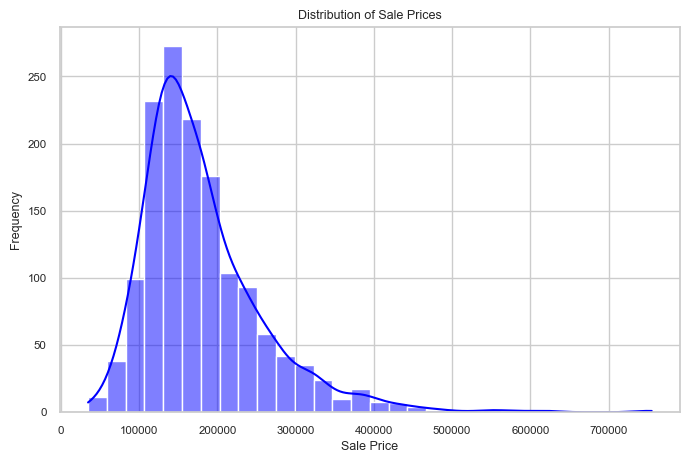

In [91]:
# Understanding the target variable SalePrice
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(8, 5))
sns.histplot(housingdf['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

**Observation on the target variable**

- The graph indicates the data is right skewed(Positive Skewness)
- Positive skewness indicates that the majority of data points are concentrated on the left side
- There are some extreme values on the right side of the distribution.

In [92]:
# Checking Skewness of numerical variable

numerical_columns = housingdf.select_dtypes(include=[np.number]).columns

# Calculate skewness and kurtosis
skewness = housingdf[numerical_columns].skew()
#kurtosis = housingdf[numerical_columns].kurt()

# Create a DataFrame from the results
#result = pd.DataFrame({'Column': numerical_columns, 'Skewness': skewness, 'Kurtosis': kurtosis})

result = pd.DataFrame({'Column': numerical_columns, 'Skewness': skewness})

# Print the result
print(result.sort_values(by=['Skewness'], ascending=False))

                      Column   Skewness
MiscVal              MiscVal  24.476794
PoolArea            PoolArea  14.828374
LotArea              LotArea  12.207688
3SsnPorch          3SsnPorch  10.304342
LowQualFinSF    LowQualFinSF   9.011341
KitchenAbvGr    KitchenAbvGr   4.488397
BsmtFinSF2        BsmtFinSF2   4.255261
ScreenPorch      ScreenPorch   4.122214
BsmtHalfBath    BsmtHalfBath   4.103403
EnclosedPorch  EnclosedPorch   3.089872
MasVnrArea        MasVnrArea   2.669084
OpenPorchSF      OpenPorchSF   2.364342
LotFrontage      LotFrontage   2.163569
SalePrice          SalePrice   1.882876
BsmtFinSF1        BsmtFinSF1   1.685503
WoodDeckSF        WoodDeckSF   1.541376
TotalBsmtSF      TotalBsmtSF   1.524255
MSSubClass        MSSubClass   1.407657
1stFlrSF            1stFlrSF   1.376757
GrLivArea          GrLivArea   1.366560
BsmtUnfSF          BsmtUnfSF   0.920268
2ndFlrSF            2ndFlrSF   0.813030
OverallCond      OverallCond   0.693067
TotRmsAbvGrd    TotRmsAbvGrd   0.676341


**Comments**

- There are few independent features having skewed data
- There could be potential outliers as the data is skewed

### Data Preparation

In [93]:
# Changing the data type of categorical variables represented in Numeric as objects

housingdf['MSSubClass'] = housingdf['MSSubClass'].astype('object')
housingdf['OverallQual'] = housingdf['OverallQual'].astype('object')
housingdf['OverallCond'] = housingdf['OverallCond'].astype('object')


In [94]:
# Separating the Numerical features for analysis

numeric_df = housingdf.select_dtypes(include=['int64', 'float64'])

print('There are', len(numeric_df.columns), 'numerical features in the dataset')
print('They are', numeric_df.columns)


There are 34 numerical features in the dataset
They are Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


### Outlier Detection

In [95]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
26  EnclosedPorch       14.25
6      BsmtFinSF2       11.44
28    ScreenPorch        7.95
4      MasVnrArea        6.58
0     LotFrontage        6.03
14   BsmtHalfBath        5.62
25    OpenPorchSF        5.27
1         LotArea        4.73
18   KitchenAbvGr        4.66
33      SalePrice        4.18
8     TotalBsmtSF        4.18
30        MiscVal        3.56
17   BedroomAbvGr        2.40
24     WoodDeckSF        2.19
12      GrLivArea        2.12
19   TotRmsAbvGrd        2.05
7       BsmtUnfSF        1.99
11   LowQualFinSF        1.78
27      3SsnPorch        1.64
23     GarageArea        1.44
9        1stFlrSF        1.37
29       PoolArea        0.48
2       YearBuilt        0.48
5      BsmtFinSF1        0.48
22     GarageCars        0.34
20     Fireplaces        0.34
10       2ndFlrSF        0.14
13   BsmtFullBath        0.07
21    GarageYrBlt        0.00
3    YearRemodAdd        0.00
16       HalfBath        0.00
15       FullBath        0.00
31         MoSold        0.00
32         YrSold        0.00

**Comment:**

- Majority of the numeric features have outliers 
- Dropping all the outliers will cause loss of information.
- Reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]** (As a house dealer , I dont want to risk on extreme high or low value than average)
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded 

In [96]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housingdf[feature].quantile(.75) - housingdf[feature].quantile(.25) 
        max_value = housingdf[feature].quantile(.75)+1.5*IQR
        min_value = housingdf[feature].quantile(.25)-1.5*IQR
        housingdf[feature][housingdf[feature] > max_value] = max_value
        housingdf[feature][housingdf[feature] < min_value ] = min_value

In [97]:
housingdf.describe()

LotFrontage       LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1201.000000   1460.000000  1460.000000   1460.000000  1452.000000   
mean     69.134888   9647.388014  1971.299315   1984.865753    90.192149   
std      19.662022   3594.356399    30.108397     20.645407   134.925253   
min      27.500000   1481.500000  1885.000000   1950.000000     0.000000   
25%      59.000000   7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000   9478.500000  1973.000000   1994.000000     0.000000   
75%      80.000000  11601.500000  2000.000000   2004.000000   166.000000   
max     111.500000  17673.500000  2010.000000   2010.000000   415.000000   

        BsmtFinSF1  BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000      1460.0  1460.000000  1460.000000  1460.000000  ...   
mean    439.997517         0.0   563.777740  1050.254795  1157.018151  ...   
std     433.219435         0.0   431.710214   397.937878   362.583002  ...   
min       0.000000         0.0     0.000000    42.000000   334.000000  ...   
25%       0.000000         0.0   223.000000   795.750000   882.000000  ...   
50%     383.500000         0.0   477.500000   991.500000  1087.000000  ...   
75%     712.250000         0.0   808.000000  1298.250000  1391.250000  ...   
max    1780.625000         0.0  1685.500000  2052.000000  2155.125000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

### Exploratory Data Analysis

**Analyzing Numerical Feature**

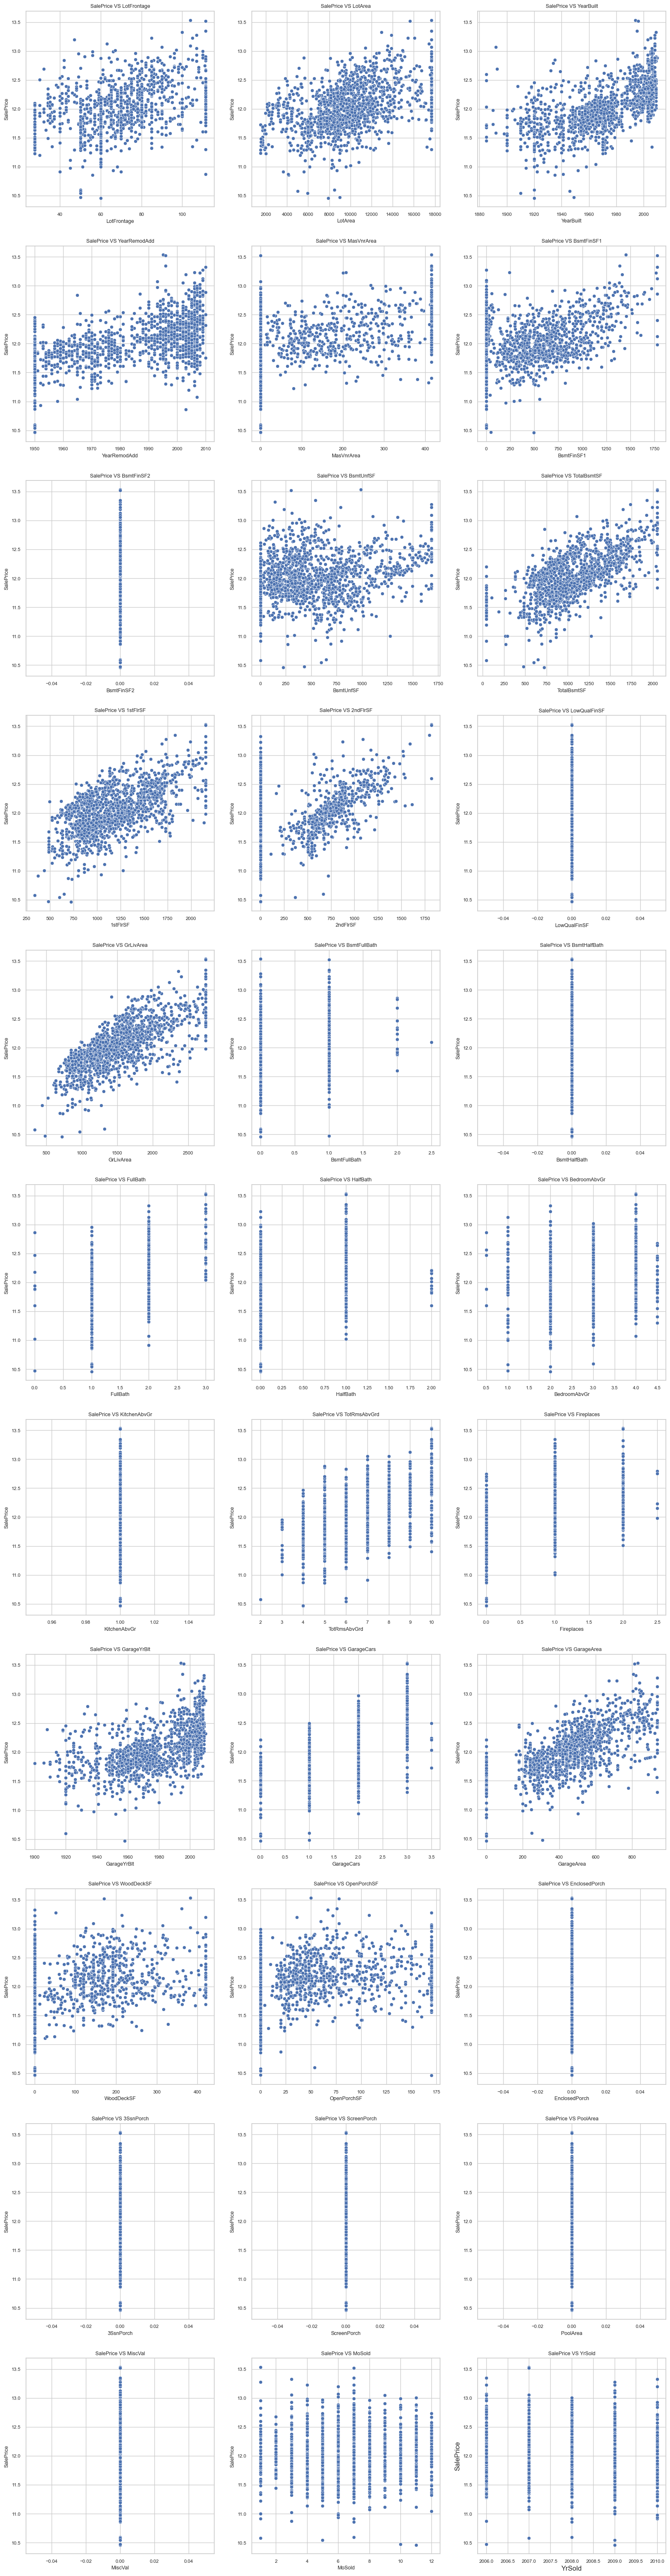

In [98]:
# Numerical columns analysis
fig,axs= plt.subplots(11,3,figsize=(20,80))
for i,ax in zip(numeric_df.columns,axs.flatten()):
    sns.scatterplot(x=i, y=np.log(housingdf['SalePrice']),data=housingdf,ax=ax,palette='icefire') # log transformation on y to normalise
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

**Comment**

The data spread appears to be single valued for the below features

These features will not be useful for our analysis

- BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea and MiscVal 



In [99]:
irrelevant_columns = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                      'PoolArea', 'MiscVal']
housingdf= housingdf.drop(columns=irrelevant_columns,axis=1)
print(housingdf.shape)

(1460, 71)


Text(121.20312499999999, 0.5, 'Features')

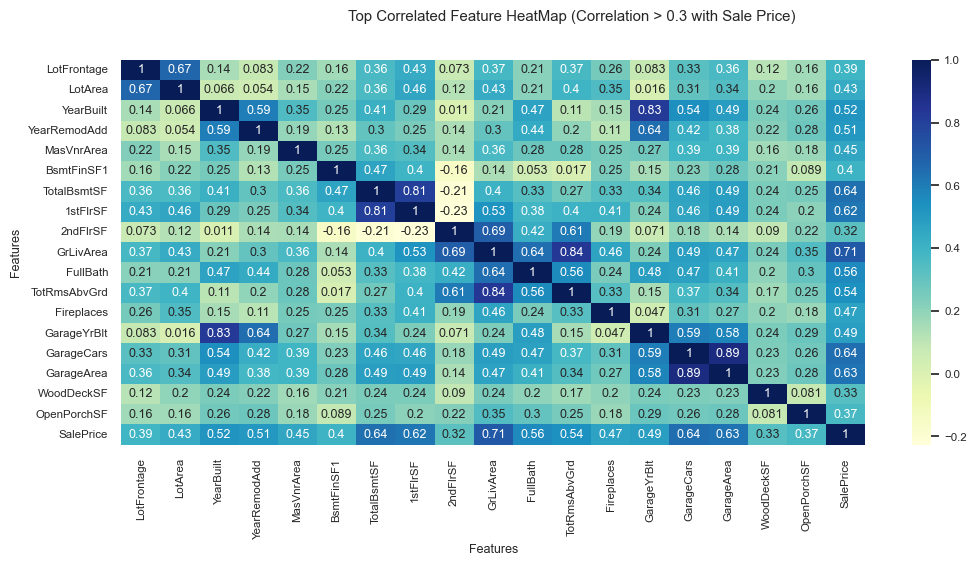

In [100]:
# Highly correlated features 
corr_mat = housingdf.corr()

sns.set(font_scale = 0.75)
plt.figure(figsize = (12,5))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.3]
g = sns.heatmap(housingdf[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.3 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

**Comment**

- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.89)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.84)
- TotalBsmtSF and 1stflrSF (0.81)


In [101]:
# Removing one from each of the above highly correlated pairs

housingdf.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)
print(housingdf.shape)

(1460, 67)


**There are few year columns , we can dervie age**

In [102]:
#Defining method to calculate age from year 

def yearToAge(data_frame,col):
    new_col = col + '_Old'
    data_frame[new_col] = housingdf[col].max()-data_frame[col]
    #print(data_frame[new_col])

In [103]:
# Converting years to age 

yearToAge(housingdf,'YearBuilt')
yearToAge(housingdf,'YearRemodAdd')
yearToAge(housingdf,'YrSold')

In [104]:
#Let's have a look on data after converting into age
housingdf[['YearBuilt','YearRemodAdd','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'YrSold_Old']].head()

YearBuilt  YearRemodAdd  YrSold  YearBuilt_Old  YearRemodAdd_Old  \
0       2003          2003    2008              7                 7   
1       1976          1976    2007             34                34   
2       2001          2002    2008              9                 8   
3       1915          1970    2006             95                40   
4       2000          2000    2008             10                10   

   YrSold_Old  
0           2  
1           3  
2           2  
3           4  
4           2

In [105]:
# Dropping the Year column as we have age column for

housingdf.drop(['YearBuilt','YearRemodAdd','YrSold'], axis=1, inplace=True)
print(housingdf.shape)

(1460, 67)


**Understanding the missing and less variant features in the data set**

In [106]:
# Function to see the missing data and unique values in a dataframe

def missing_data(dframe,n):    
    
    # Total No of missing values
    total = dframe.isnull().sum().sort_values(ascending=False)          
    
     # % of Missing values
    percentage = (dframe.isnull().sum() / dframe.isnull().count()).sort_values(ascending=False)*100 
    
    # No of unique values
    No_unique_val = dframe.nunique()                                   
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [107]:
missing_data(housingdf,25)

                  Total No of missing val  % of Missing val  No of unique val
PoolQC                               1453         99.520548                 3
MiscFeature                          1406         96.301370                 4
Alley                                1369         93.767123                 2
Fence                                1179         80.753425                 4
FireplaceQu                           690         47.260274                 5
LotFrontage                           259         17.739726                83
GarageFinish                           81          5.547945                 3
GarageType                             81          5.547945                 6
GarageCond                             81          5.547945                 5
GarageQual                             81          5.547945                 5
BsmtExposure                           38          2.602740                 4
BsmtFinType2                           38          2.602740     

In [108]:
# Removing the columns which has more than 80% of data values as null

threshold = 0.8  # To Remove columns that 80% or more values are null
housingdf = housingdf[housingdf.columns[housingdf.isnull().mean() < threshold]]
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0   8450.0   Pave      Reg         Lvl   
1         20       RL         80.0   9600.0   Pave      Reg         Lvl   
2         60       RL         68.0  11250.0   Pave      IR1         Lvl   
3         70       RL         60.0   9550.0   Pave      IR1         Lvl   
4         60       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PavedDrive WoodDeckSF OpenPorchSF MoSold  \
0    AllPub    Inside       Gtl  ...          Y          0          61      2   
1    AllPub       FR2       Gtl  ...          Y        298           0      5   
2    AllPub    Inside       Gtl  ...          Y          0          42      9   
3    AllPub    Corner       Gtl  ...          Y          0          35      2   
4    AllPub       FR2       Gtl  ...          Y        192          84     12   

  SaleType SaleCondition SalePrice YearBuilt_Old YearRemodAdd_Old YrSold_Old  
0       WD        Normal    208500             7                7          2  
1       WD        Normal    181500            34               34          3  
2       WD        Normal    223500             9                8          2  
3       WD       Abnorml    140000            95               40          4  
4       WD        Normal    250000            10               10          2  

[5 rows x 63 columns]

**Handling features that will not be useful because of less variance**



In [109]:
#To get columns which has single/same value throughout
same_valued_columns = housingdf.columns[housingdf.nunique() == 2]

# Print the number of single-valued columns
print(same_valued_columns)

Index(['Street', 'Utilities', 'CentralAir'], dtype='object')


In [110]:
# Understanding the value distrubution of less variant features

print(housingdf.Street.value_counts())
print(housingdf.Utilities.value_counts())
print(housingdf.CentralAir.value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64


**Comment**

- As per the analysis 'Street' & 'Utilities' is explaining the lowest variance hence dropping these columns.

In [111]:
housingdf.drop(['Street','Utilities',], axis=1, inplace=True)
print(housingdf.shape)

(1460, 61)


In [112]:
missing_data(housingdf,25)

                  Total No of missing val  % of Missing val  No of unique val
FireplaceQu                           690         47.260274                 5
LotFrontage                           259         17.739726                83
GarageQual                             81          5.547945                 5
GarageType                             81          5.547945                 6
GarageFinish                           81          5.547945                 3
GarageCond                             81          5.547945                 5
BsmtFinType2                           38          2.602740                 6
BsmtExposure                           38          2.602740                 4
BsmtFinType1                           37          2.534247                 6
BsmtCond                               37          2.534247                 4
BsmtQual                               37          2.534247                 4
MasVnrArea                              8          0.547945     



## Observation of Missing Value

### Columns with higher percentage of null values 

- FireplaceQu has 47.26% of missing value and NA means No Fire place, hence replacing NA with None
- LotFrontage has 17.73% of missing values and means Linear feet of street connected to property, hence replacing with Median

### Columns with lower percentage of null values 

- GarageType has 5.54% of missing value and NA means No garage,hence replacing NA with None
- GarageFinish has 5.54% of missing value and NA means No garage,hence replacing NA with None
- GarageQual has 5.54% of missing value and NA means No garage,hence replacing NA with None
- GarageCond has 5.54% of missing value and NA means No garage,hence replacing NA with None
- BsmtExposure has 2.6% of missing values and NA means No basement,hence replacing NA with None
- BsmtFinType2 has 2.6% of missing values and NA means No basement,hence replacing NA with None
- BsmtQual has 2.5% of missing values and NA means No basement,hence replacing NA with None
- BsmtCond has 2.5% of missing values and NA means No basement,hence replacing NA with None
- BsmtFinType1 has 2.5% of missing values and NA means No basement,hence replacing NA with None
- MasVnrType has 0.54% of missing values and NA means No Masonry Veneer, hence replacing with None
- MasVnrArea has 0.54% of missing values and NA means No Masonry Veneer, hence replacing with 0
- Electrical has 1 missing value , hence replacing it with mode  



In [113]:
# function to HANDLE the missing data in a dataframe

def handle_missing (dframe):
    
     # Null value likely means No Fireplace so fill as "None"
    housingdf["FireplaceQu"] = housingdf["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    housingdf["LotFrontage"] = housingdf["LotFrontage"].fillna(housingdf["LotFrontage"].median())
    
    # Only one null value so fill as the most frequent value(mode)
    housingdf['Electrical'] = housingdf['Electrical'].fillna(housingdf['Electrical'].mode()[0])
    
    # Null value likely means no masonry veneer
    housingdf["MasVnrType"] = housingdf["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    housingdf["MasVnrArea"] = housingdf["MasVnrArea"].fillna(0)      #so fill as o
    
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        housingdf[col] = housingdf[col].fillna('None')
    
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        housingdf[col] = housingdf[col].fillna('None')
    
    return dframe

In [114]:
handle_missing(housingdf)


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0            60       RL         65.0   8450.0      Reg         Lvl    Inside   
1            20       RL         80.0   9600.0      Reg         Lvl       FR2   
2            60       RL         68.0  11250.0      IR1         Lvl    Inside   
3            70       RL         60.0   9550.0      IR1         Lvl    Corner   
4            60       RL         84.0  14260.0      IR1         Lvl       FR2   
5            50       RL         85.0  14115.0      IR1         Lvl    Inside   
6            20       RL         75.0  10084.0      Reg         Lvl    Inside   
7            60       RL         69.0  10382.0      IR1         Lvl    Corner   
8            50       RM         51.0   6120.0      Reg         Lvl    Inside   
9           190       RL         50.0   7420.0      Reg         Lvl    Corner   
10           20       RL         70.0  11200.0      Reg         Lvl    Inside   
11           60       RL         85.0  11924.0      IR1         Lvl    Inside   
12           20       RL         69.0  12968.0      IR2         Lvl    Inside   
13           20       RL         91.0  10652.0      IR1         Lvl    Inside   
14           20       RL         69.0  10920.0      IR1         Lvl    Corner   
15           45       RM         51.0   6120.0      Reg         Lvl    Corner   
16           20       RL         69.0  11241.0      IR1         Lvl   CulDSac   
17           90       RL         72.0  10791.0      Reg         Lvl    Inside   
18           20       RL         66.0  13695.0      Reg         Lvl    Inside   
19           20       RL         70.0   7560.0      Reg         Lvl    Inside   
20           60       RL        101.0  14215.0      IR1         Lvl    Corner   
21           45       RM         57.0   7449.0      Reg         Bnk    Inside   
22           20       RL         75.0   9742.0      Reg         Lvl    Inside   
23          120       RM         44.0   4224.0      Reg         Lvl    Inside   
24           20       RL         69.0   8246.0      IR1         Lvl    Inside   
25           20       RL        110.0  14230.0      Reg         Lvl    Corner   
26           20       RL         60.0   7200.0      Reg         Lvl    Corner   
27           20       RL         98.0  11478.0      Reg         Lvl    Inside   
28           20       RL         47.0  16321.0      IR1         Lvl   CulDSac   
29           30       RM         60.0   6324.0      IR1         Lvl    Inside   
30           70  C (all)         50.0   8500.0      Reg         Lvl    Inside   
31           20       RL         69.0   8544.0      IR1         Lvl   CulDSac   
32           20       RL         85.0  11049.0      Reg         Lvl    Corner   
33           20       RL         70.0  10552.0      IR1         Lvl    Inside   
34          120       RL         60.0   7313.0      Reg         Lvl    Inside   
35           60       RL        108.0  13418.0      Reg         Lvl    Inside   
36           20       RL        111.5  10859.0      Reg         Lvl    Corner   
37           20       RL         74.0   8532.0      Reg         Lvl    Inside   
38           20       RL         68.0   7922.0      Reg         Lvl    Inside   
39           90       RL         65.0   6040.0      Reg         Lvl    Inside   
40           20       RL         84.0   8658.0      Reg         Lvl    Inside   
41           20       RL        111.5  16905.0      Reg         Lvl    Inside   
42           85       RL         69.0   9180.0      IR1         Lvl   CulDSac   
43           20       RL         69.0   9200.0      IR1         Lvl   CulDSac   
44           20       RL         70.0   7945.0      Reg         Lvl    Inside   
45          120       RL         61.0   7658.0      Reg         Lvl    Inside   
46           50       RL         48.0  12822.0      IR1         Lvl   CulDSac   
47           20       FV         84.0  11096.0      Reg         Lvl    Inside   
48          190       RM         33.

In [115]:
missing_data(housingdf,5)

            Total No of missing val  % of Missing val  No of unique val
MSSubClass                        0               0.0                15
Heating                           0               0.0                 6
CentralAir                        0               0.0                 2
Electrical                        0               0.0                 5
1stFlrSF                          0               0.0               734


In [116]:
housingdf.shape

(1460, 61)

### Analyzing Categorical Features


In [117]:
categorical_df = housingdf.select_dtypes(include=['object'])
print('There are', len(categorical_df.columns),  'categorical features in the dataset')
print('They are', categorical_df.columns)

There are 40 categorical features in the dataset
They are Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


**Separating Categorical Variables into Ordered and Unordered**

**Ordered Features**
'LotShape', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',GarageCond', 'CentralAir'

**Unordered Features**
'MSSubClass','MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition'

In [118]:
def generate_boxplot(feature_list, rows, columns):
    # Assuming housingdf is your DataFrame containing the data
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20, 16))
    plt.subplots_adjust(hspace=2)  # Adjust vertical spacing between subplots
    
    for i, feature in enumerate(feature_list):
        row, col = divmod(i, 2)  # Calculate row and column indices
        sns.boxplot(x=housingdf[feature], y=housingdf['SalePrice'], ax=axes[row, col])
        axes[row, col].set_title(f"Boxplot for {feature}")
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel("SalePrice")
    
    plt.tight_layout()

**Analyzing Ordered Categorical features**

- Dividing them into smaller parts for better visualization



In [119]:
# Separating ordered features for better visualization

Ordered_feature1=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageFinish', 'GarageQual','GarageCond']

Ordered_feature2=['OverallQual', 'OverallCond','ExterQual', 'ExterCond' ,'FireplaceQu','KitchenQual']

Ordered_feature3 =['LotShape', 'LandSlope', 'HouseStyle','HeatingQC','Functional','CentralAir']

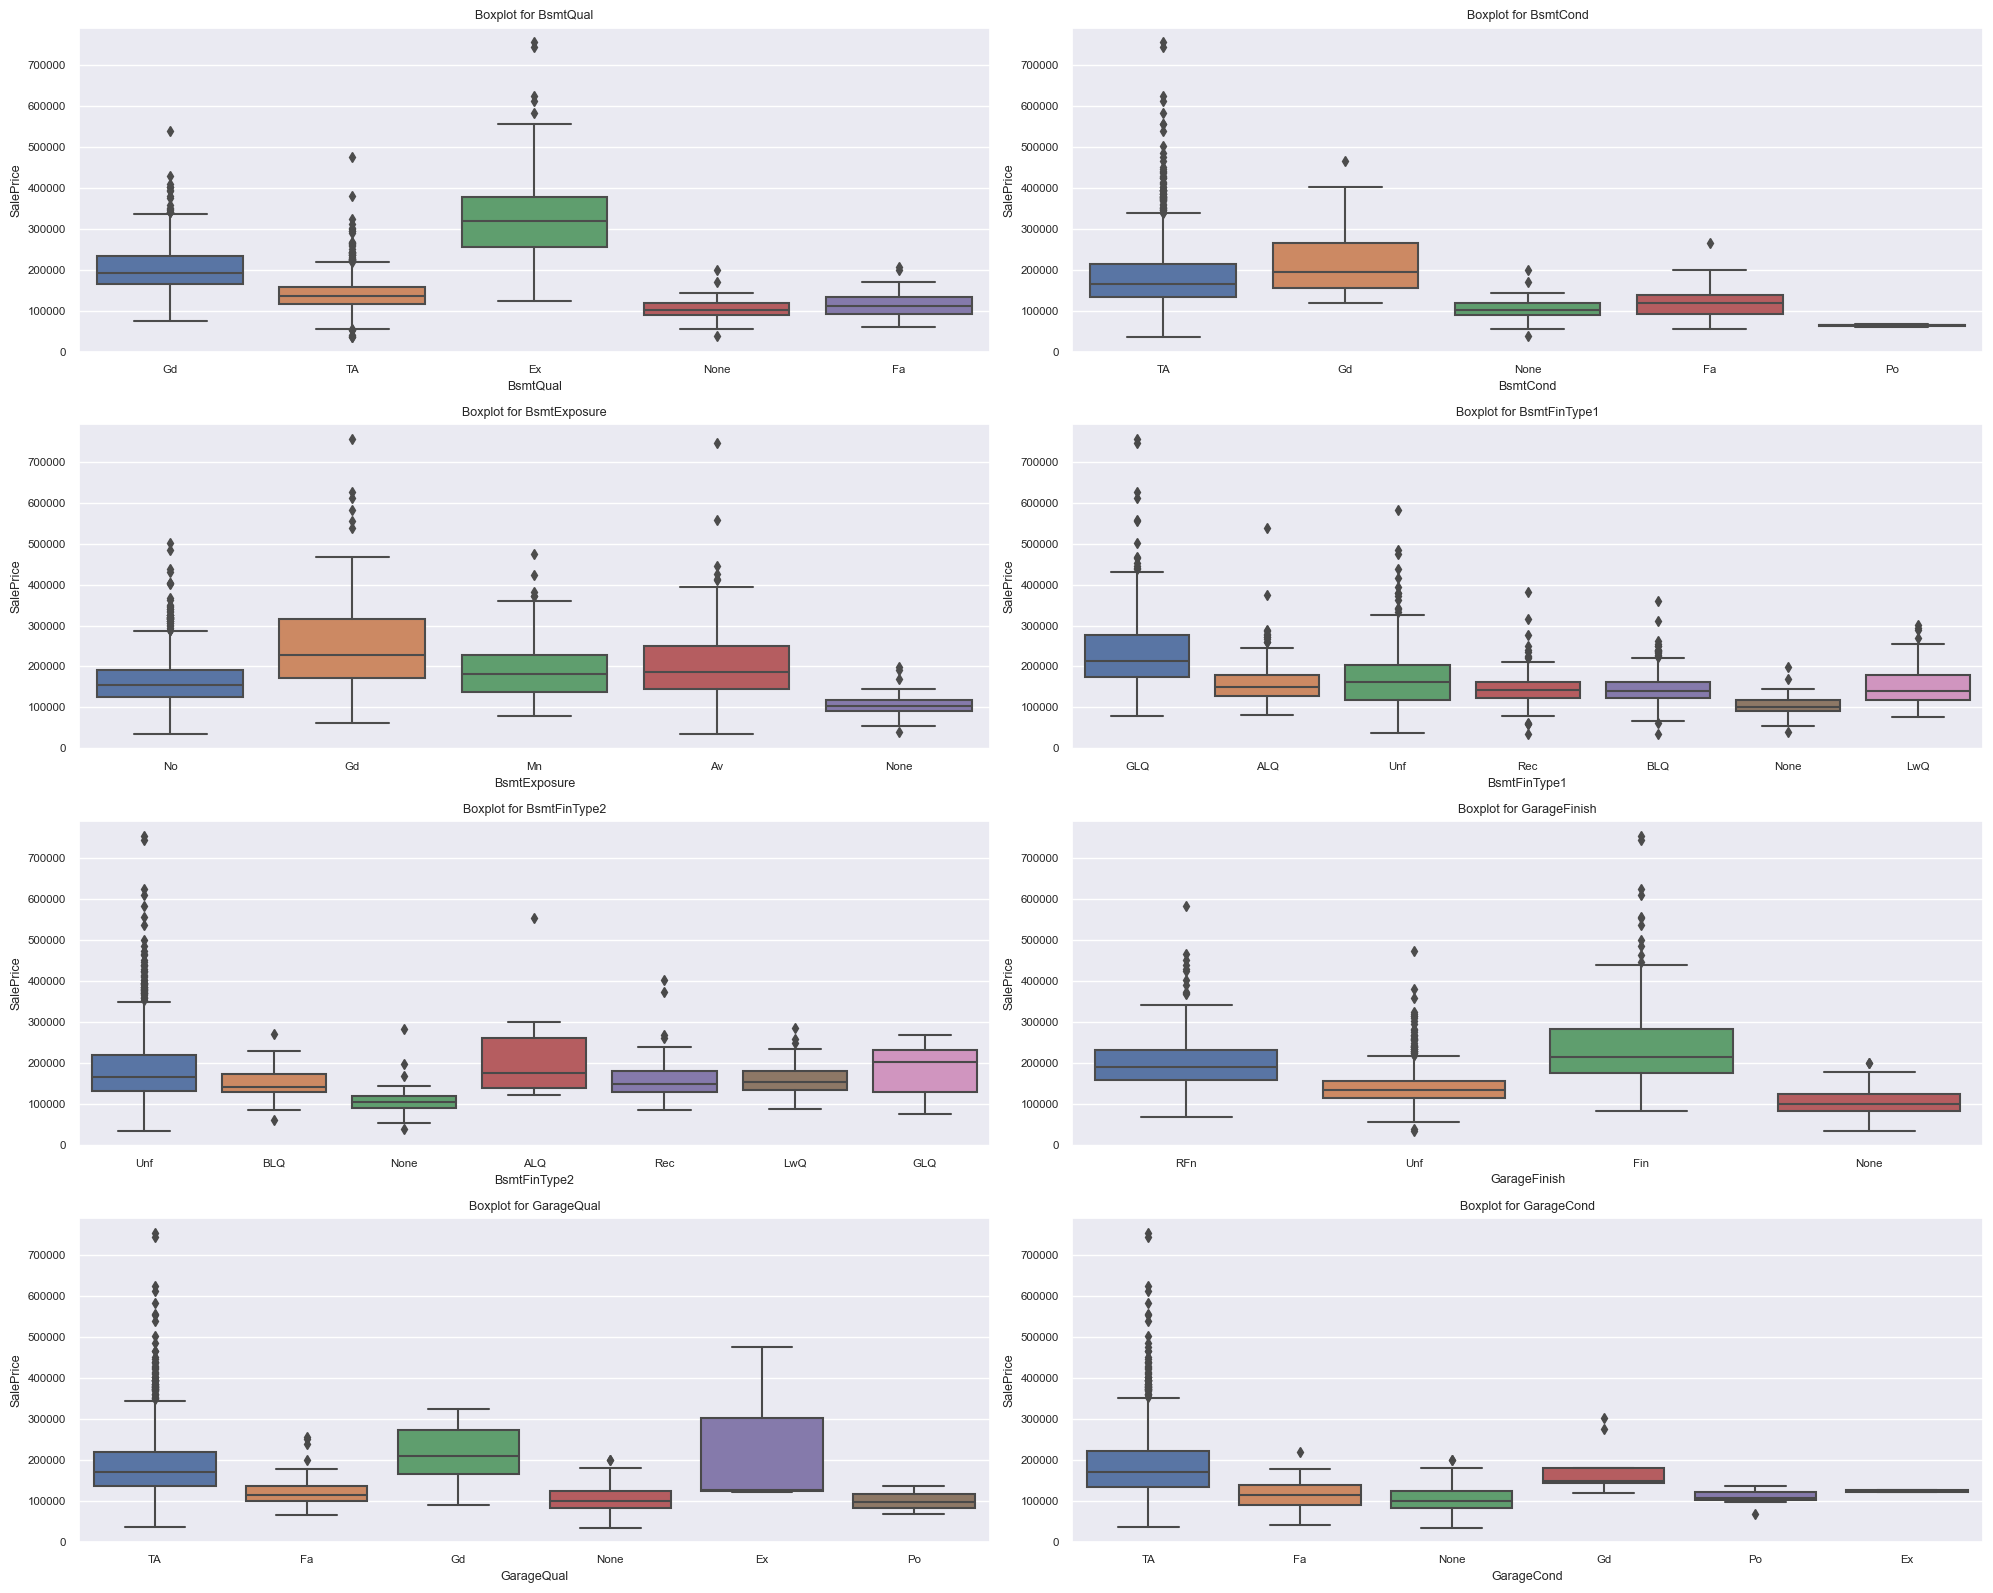

In [120]:
generate_boxplot(Ordered_feature1,4,2)

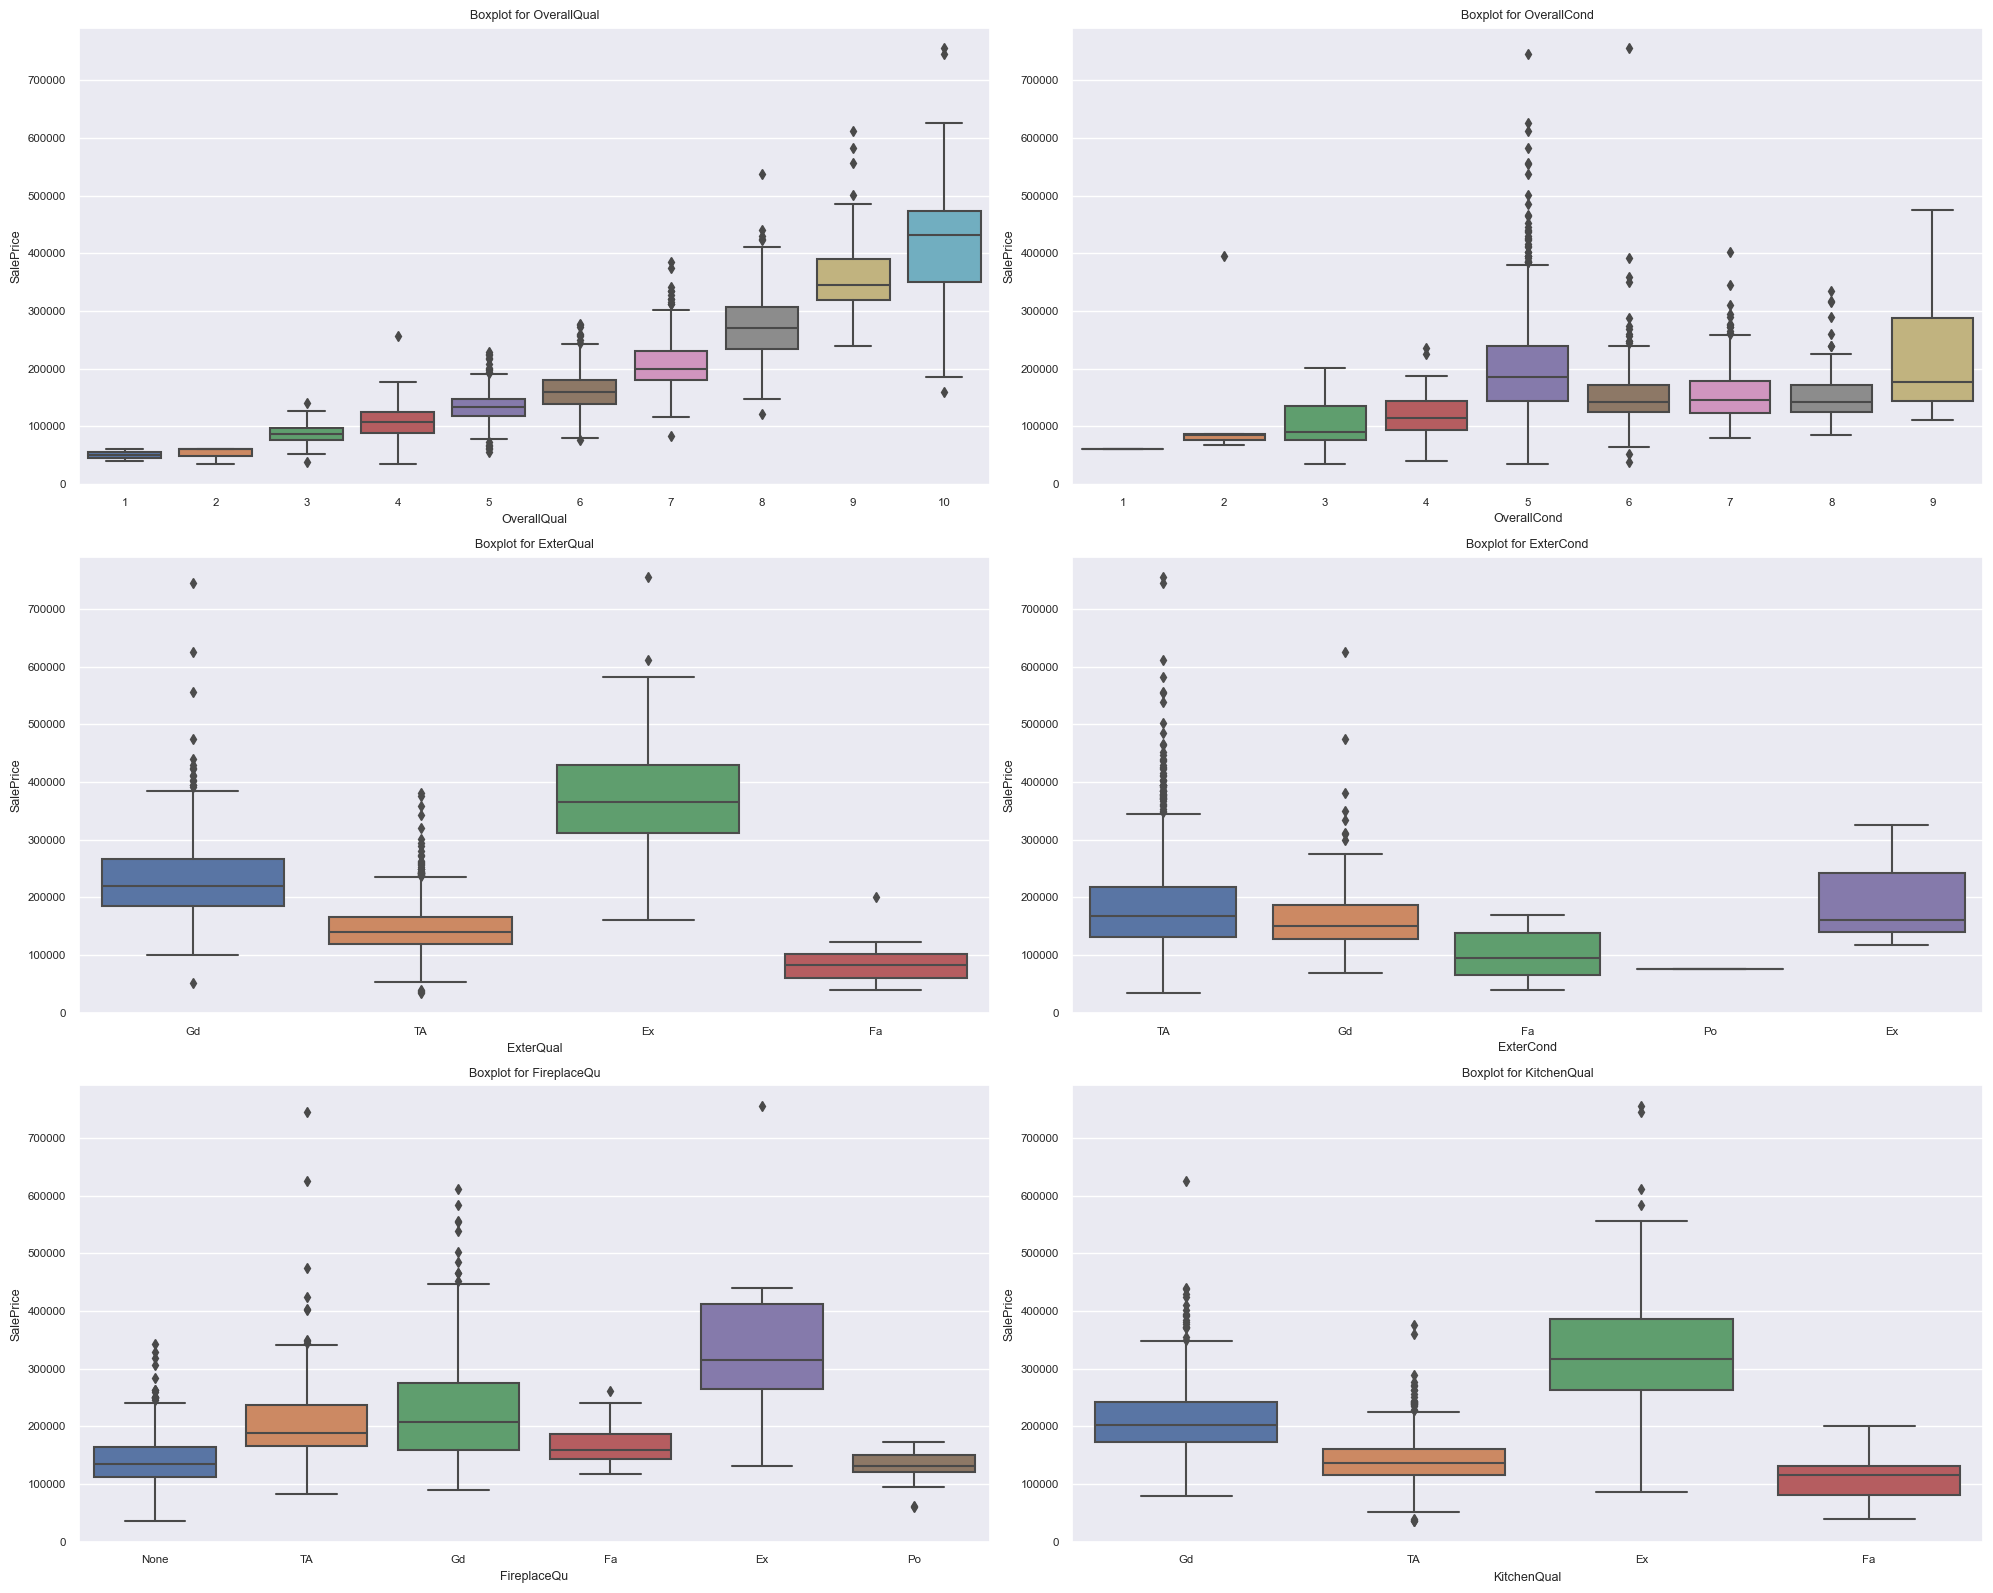

In [121]:
generate_boxplot(Ordered_feature2,3,2)

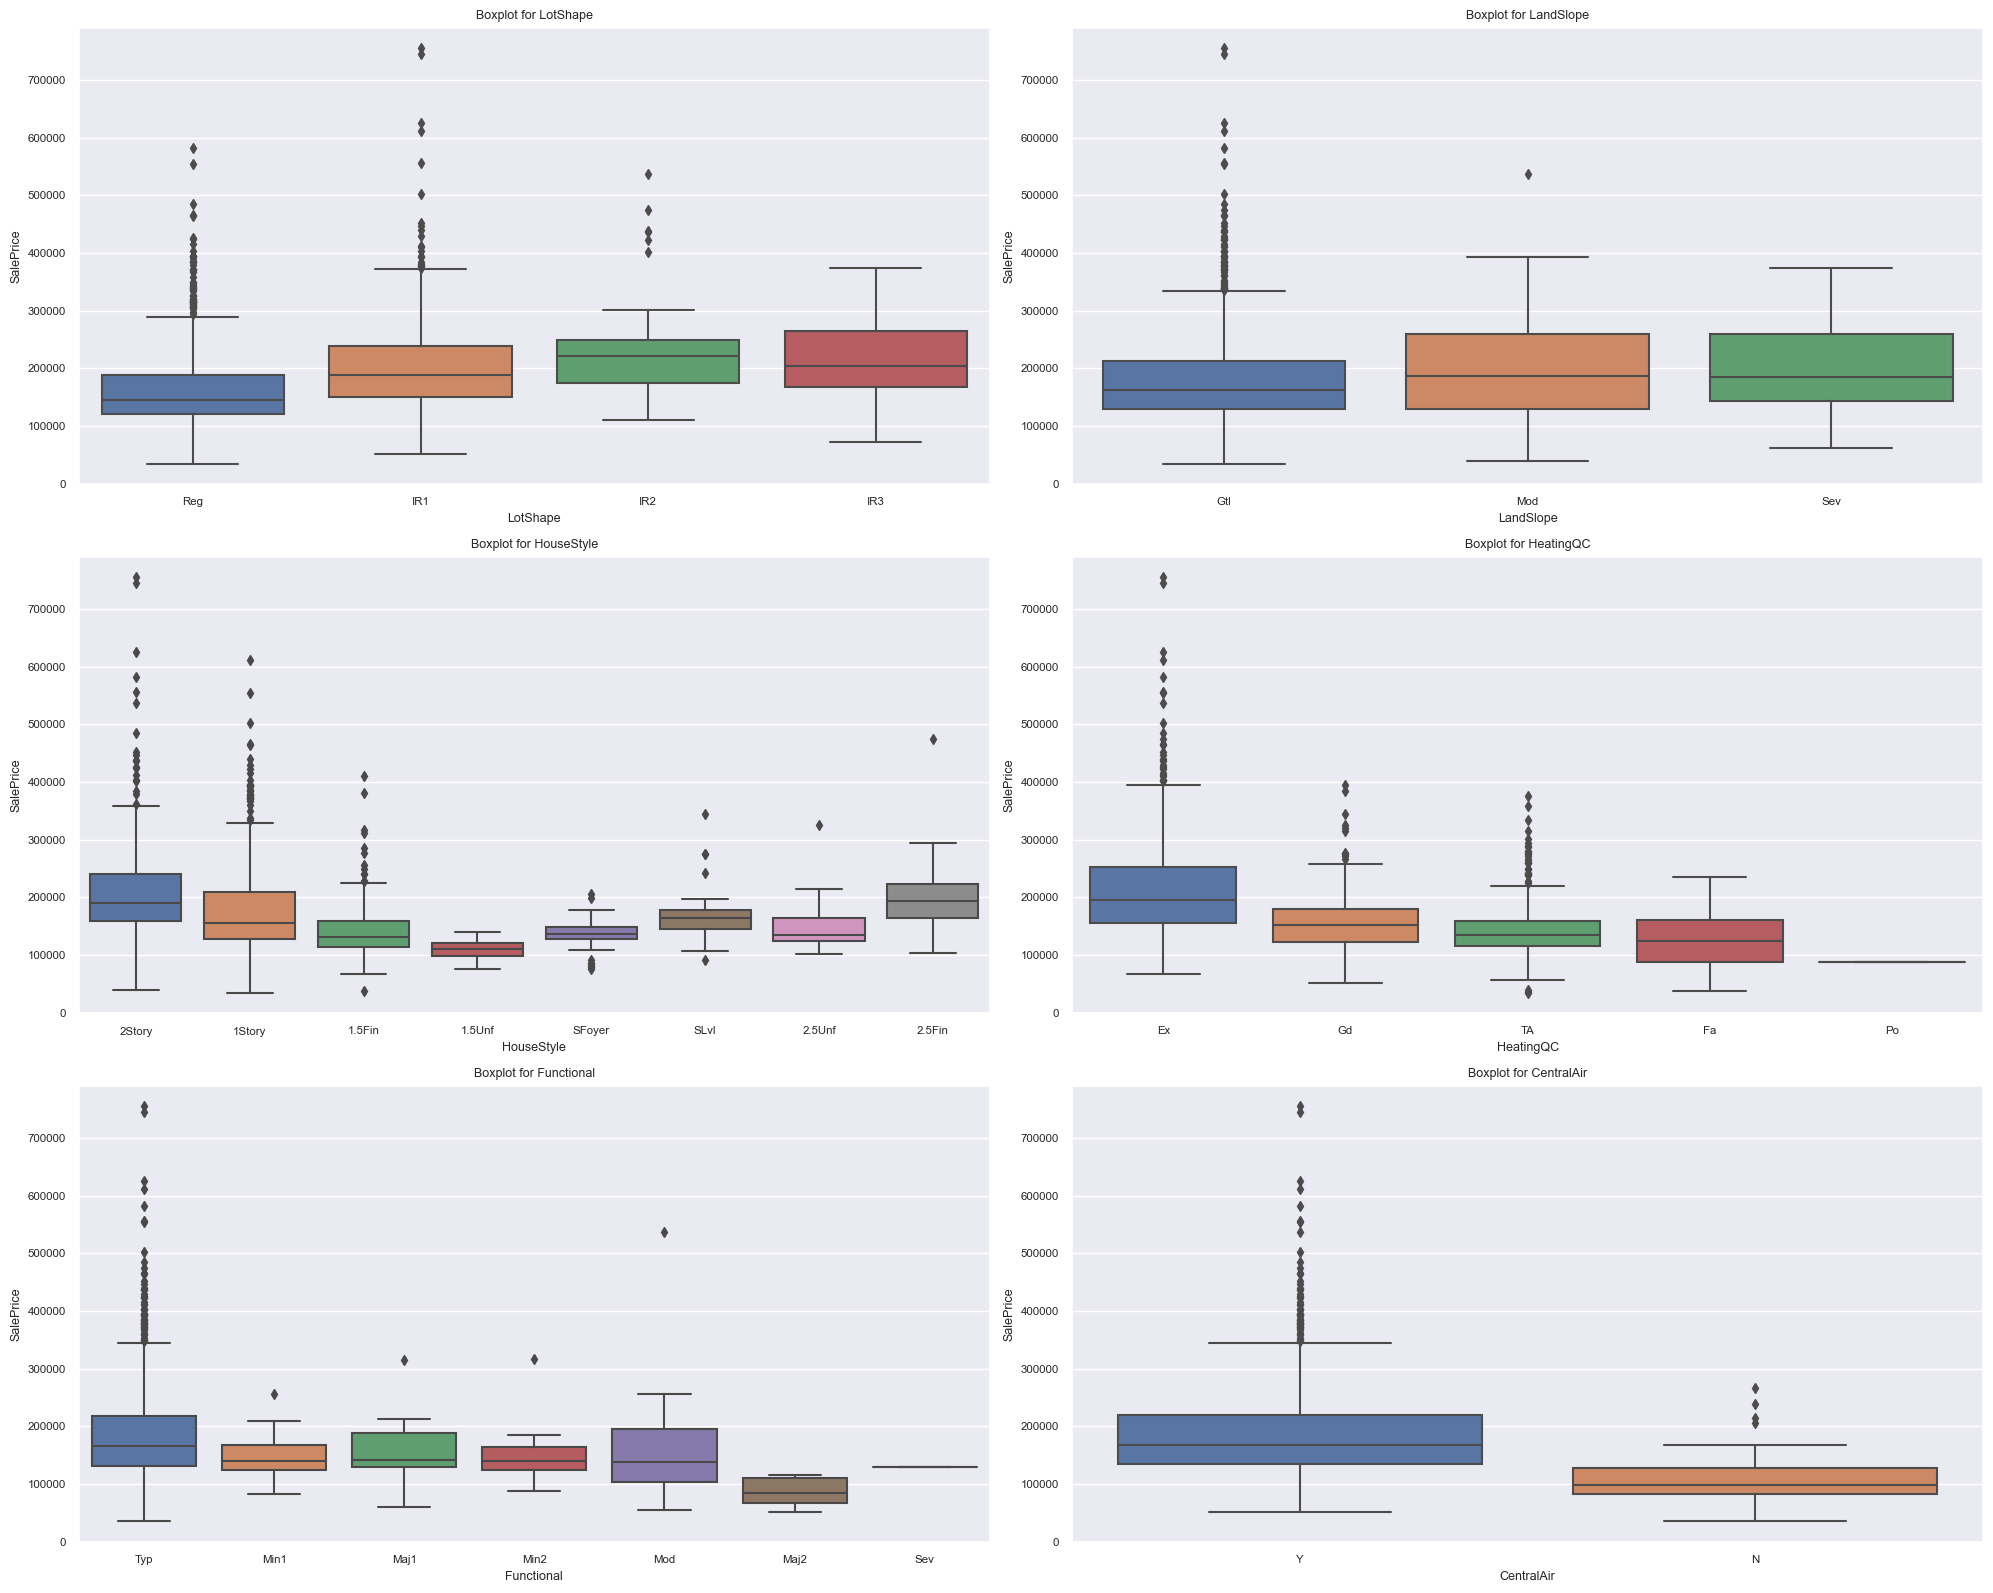

In [122]:
generate_boxplot(Ordered_feature3,3,2)

**Observations on ordered categorical features**

- Slightly irregular LotShape have the highest SalePrice
- Houses at severe land slope have lowest SalePrice
- 2 storied houses have the highest SalePrice
- Houses with Excellent quality of material on the exterior have the highest SalePrice
- Houses with Excellent condition of material on the exterior have the highest SalePrice
- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. 
- SalePrice increases significantly with increase in overall condition and Overall Quality
- SalePrice range in largest for houses with average fireplace quality.
- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.
- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)


**Analyzing Un-Ordered Categorical features**

- Dividing them into smaller parts for better visualization

In [123]:
# Separating ordered features for better visualization

unOrdered_feature1=['MSSubClass','MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType',]

unOrdered_feature2=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']

unOrdered_feature3 =['Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']

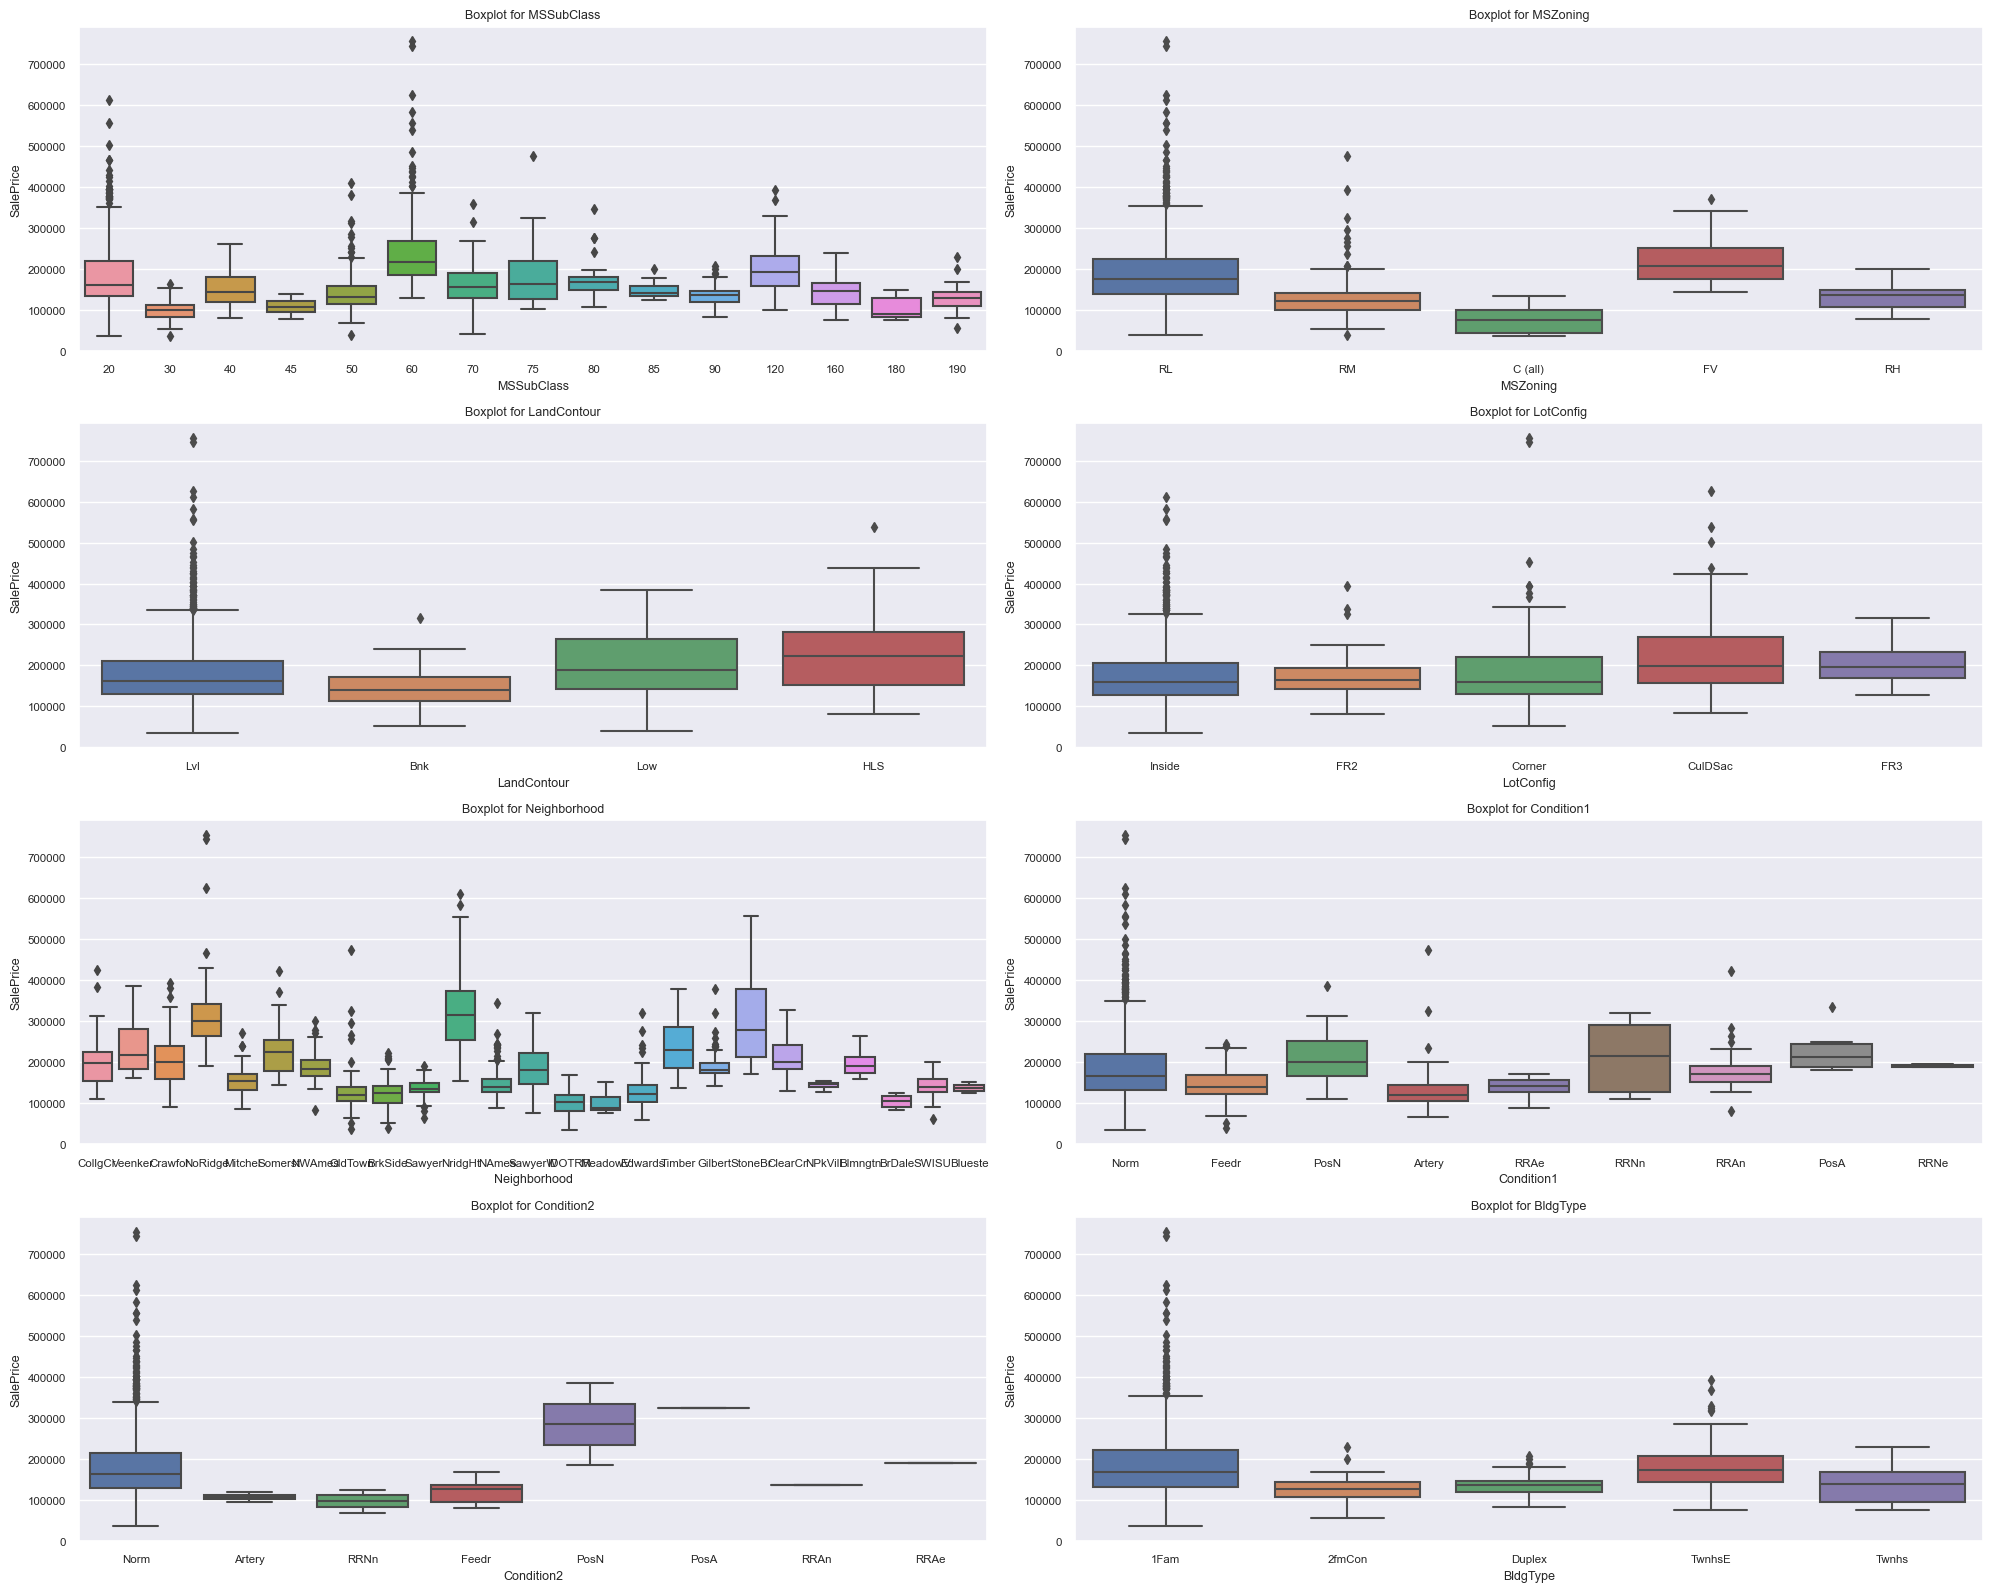

In [124]:
generate_boxplot(unOrdered_feature1,4,2)

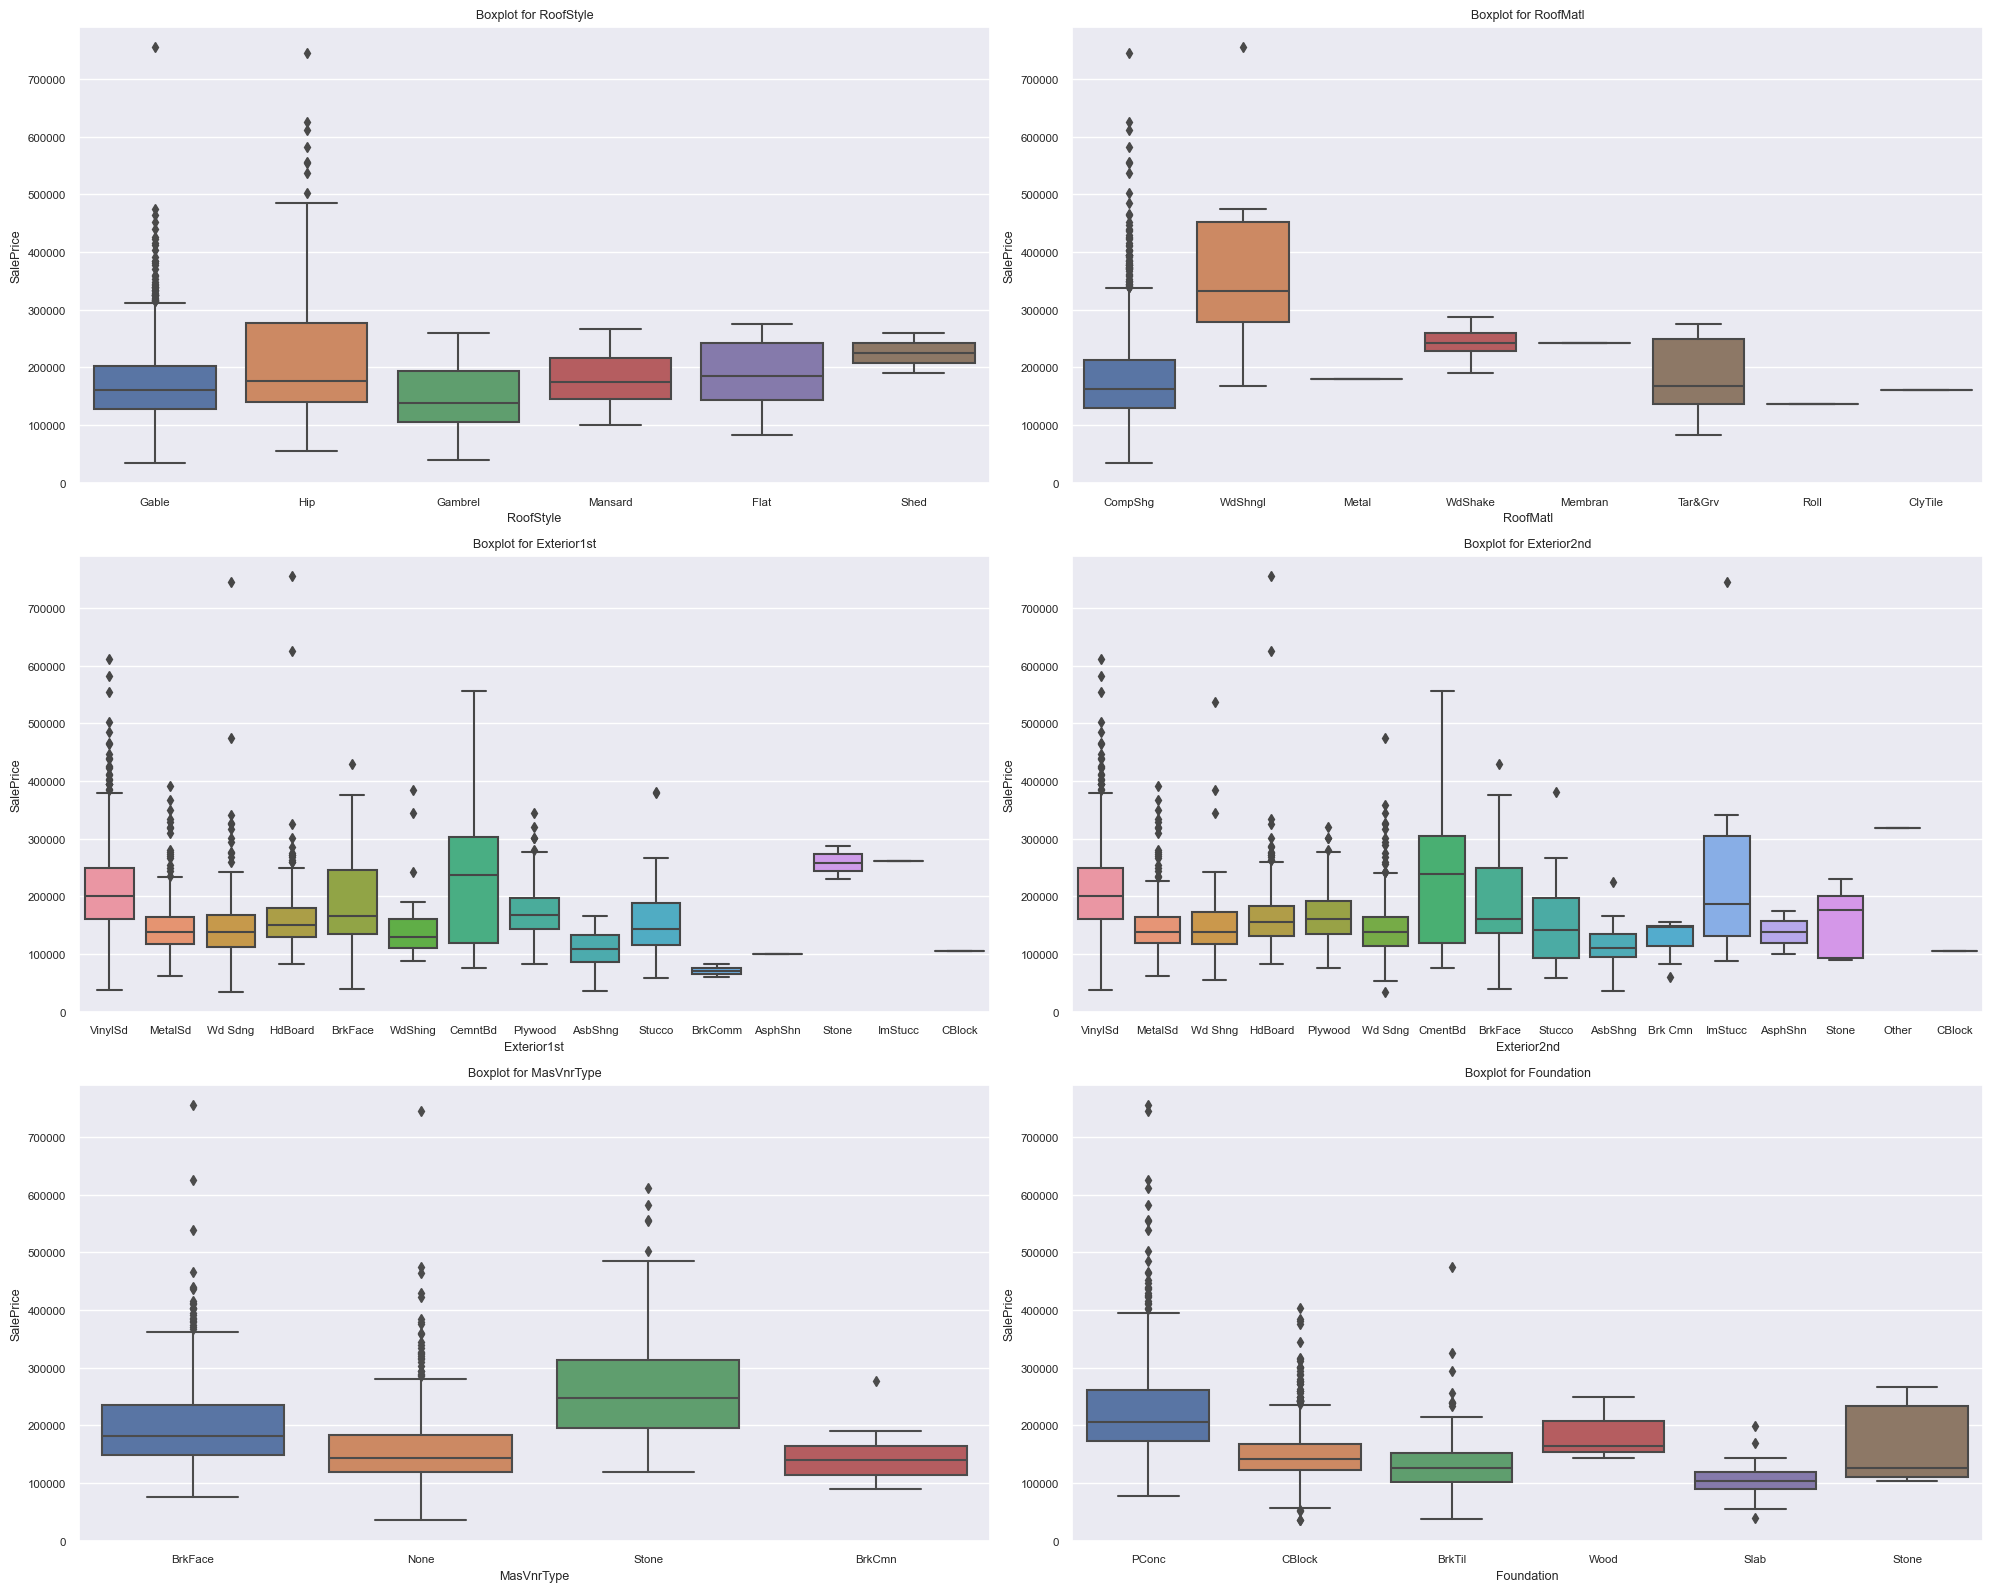

In [125]:
generate_boxplot(unOrdered_feature2,3,2)

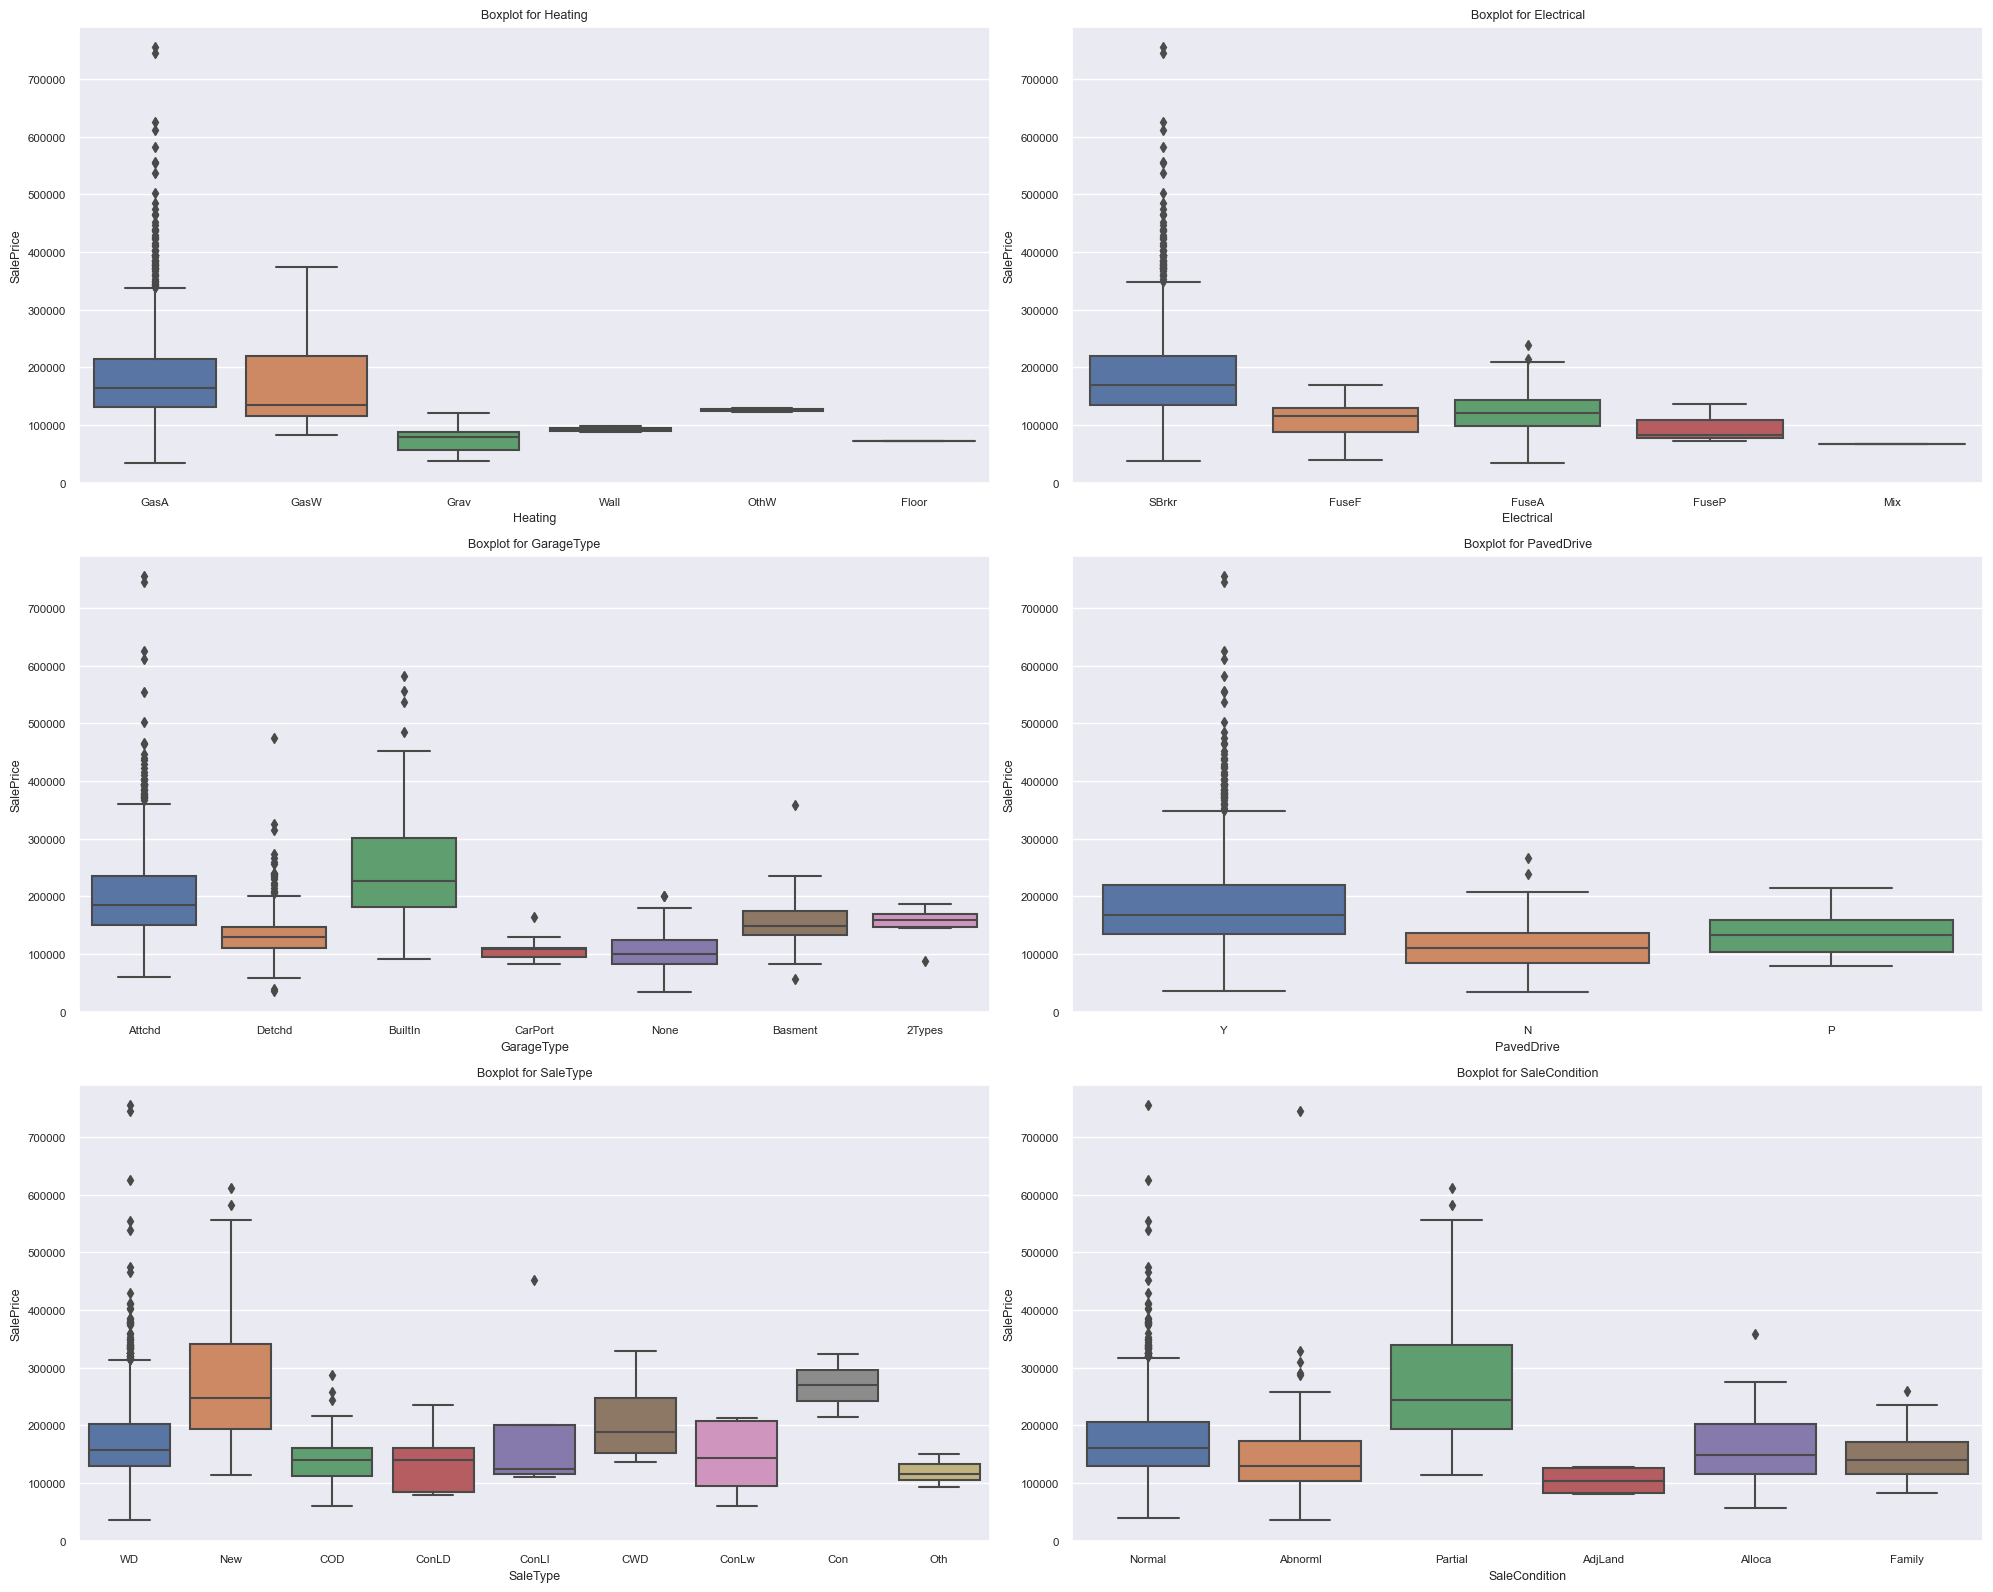

In [126]:
generate_boxplot(unOrdered_feature3,3,2)

**Observartions on Un-Ordered categorical data**

- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd',condition2 have some labels with very few data
- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price
- Stoned MasVnrType house are high priced
- Houses with attached and built-in garage have high SalePrice
- Newly Built house and PavedDrive way as yes has SalePrice high 


**Encoding For Categorical Variables**

**Ordered Features -- to be label encoded**
'LotShape', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSSubClass','MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition'

In [127]:
# Ordinal Encoding for odered categorical variables

housingdf['LotShape'] = housingdf['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housingdf['LandSlope'] = housingdf['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housingdf['HouseStyle'] = housingdf['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housingdf['ExterQual'] = housingdf['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['ExterCond'] = housingdf['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['HeatingQC'] = housingdf['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['CentralAir'] = housingdf['CentralAir'].map({'N':0,'Y':1})
housingdf['KitchenQual'] = housingdf['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housingdf['Functional'] = housingdf['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housingdf['BsmtExposure'] = housingdf['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housingdf['BsmtFinType1'] = housingdf['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housingdf['BsmtFinType2'] = housingdf['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housingdf['BsmtQual'] = housingdf['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingdf['BsmtCond'] = housingdf['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingdf['GarageFinish'] = housingdf['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housingdf['GarageQual'] = housingdf['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingdf['GarageCond'] = housingdf['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housingdf['FireplaceQu'] = housingdf['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [128]:
# Checking the features after encoding

housingdf[['LotShape', 'LandSlope','OverallQual', 'OverallCond', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir','KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   int64 
 1   LandSlope     1460 non-null   int64 
 2   OverallQual   1460 non-null   object
 3   OverallCond   1460 non-null   object
 4   HouseStyle    1460 non-null   int64 
 5   ExterQual     1460 non-null   int64 
 6   ExterCond     1460 non-null   int64 
 7   BsmtQual      1460 non-null   int64 
 8   BsmtCond      1460 non-null   int64 
 9   BsmtExposure  1460 non-null   int64 
 10  BsmtFinType1  1460 non-null   int64 
 11  BsmtFinType2  1460 non-null   int64 
 12  HeatingQC     1460 non-null   int64 
 13  CentralAir    1460 non-null   int64 
 14  KitchenQual   1460 non-null   int64 
 15  Functional    1460 non-null   int64 
 16  FireplaceQu   1460 non-null   int64 
 17  GarageFinish  1460 non-null   int64 
 18  GarageQual    1460 non-null   int64 
 19  Garage

In [129]:
# One Hot Encoding for Un ordered Catergorical features

unordered_features=['MSSubClass','MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 
                    'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                    'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']

dummy_df = pd.get_dummies(housingdf[unordered_features], drop_first=True)

dummy_df.shape

(1460, 147)

**Comment:**

- Adding 147 features to the existing dataset will make the model very complex.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [130]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'R

In [131]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1460, 49)


In [132]:
housingdf.shape

(1460, 61)

In [133]:
# Adding the dummy variables to the original dataframe
housingdf = pd.concat([housingdf,dummy_df],axis=1)

# Dropping the redundant columns
housingdf = housingdf.drop(unordered_features,axis=1)

In [134]:
housingdf.shape

(1460, 90)

### Spliting the Data into Train and Test

In [135]:
X = housingdf.drop(['SalePrice'], axis=1)
X.head()

LotFrontage  LotArea  LotShape  LandSlope  HouseStyle OverallQual  \
0         65.0   8450.0         3          0           3           7   
1         80.0   9600.0         3          0           0           6   
2         68.0  11250.0         0          0           3           7   
3         60.0   9550.0         0          0           3           7   
4         84.0  14260.0         0          0           3           8   

  OverallCond  MasVnrArea  ExterQual  ExterCond  ...  Electrical_SBrkr  \
0           5       196.0          3          2  ...                 1   
1           8         0.0          2          2  ...                 1   
2           5       162.0          3          2  ...                 1   
3           5         0.0          2          2  ...                 1   
4           5       350.0          3          2  ...                 1   

   GarageType_Attchd  GarageType_BuiltIn  GarageType_Detchd  GarageType_None  \
0                  1                   0                  0                0   
1                  1                   0                  0                0   
2                  1                   0                  0                0   
3                  0                   0                  1                0   
4                  1                   0                  0                0   

   PavedDrive_Y  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0             1             0            1                     1   
1             1             0            1                     1   
2             1             0            1                     1   
3             1             0            1                     0   
4             1             0            1                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 89 columns]

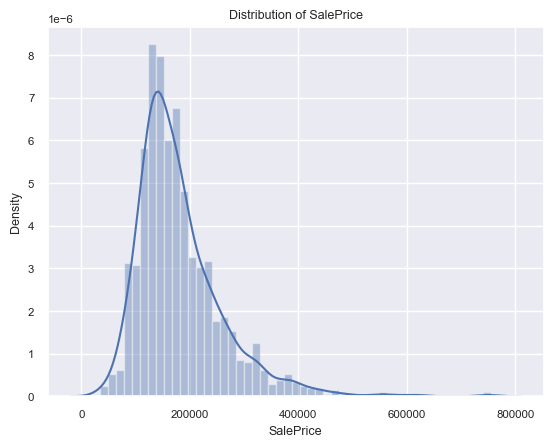

In [136]:
plt.title('Distribution of SalePrice')
sns.distplot(housingdf['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

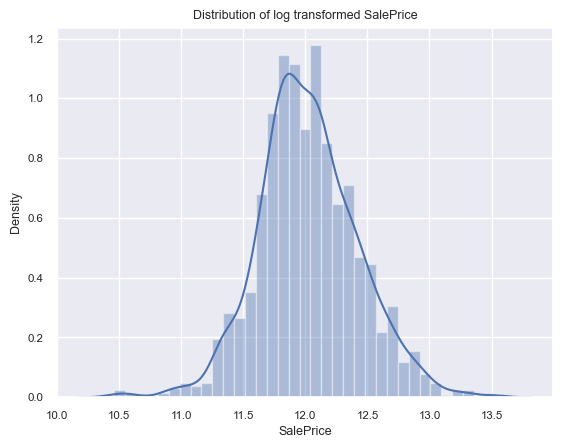

In [137]:
sns.distplot(np.log(housingdf['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [138]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housingdf['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [140]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 89)
(292, 89)
(1168,)
(292,)


### Feature Scaling

In [141]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [142]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [143]:
print(X_tr_scaled)

      LotFrontage   LotArea  LotShape  LandSlope  HouseStyle  OverallQual  \
0        0.824270  0.803536  0.751914  -0.222613   -0.846459    -0.076224   
1        0.936344  0.413823 -1.374564  -0.222613   -0.846459     0.653530   
2       -0.016288  0.675943 -1.374564  -0.222613    0.703171    -0.076224   
3        2.225200 -0.275731  0.751914  -0.222613   -0.846459    -0.805979   
4        0.095786 -0.101262  0.751914  -0.222613   -0.846459    -1.535733   
5        0.880307  0.356407  0.751914  -0.222613    0.703171     2.842793   
6        2.365293  0.482335 -1.374564  -0.222613   -0.846459    -0.076224   
7       -2.341832 -1.996013  0.751914  -0.222613    0.703171     0.653530   
8       -0.520623 -0.864876  0.751914  -0.222613   -0.846459    -0.805979   
9        0.432009  0.018841 -1.374564  -0.222613    0.186628    -0.076224   
10      -1.473256 -1.812945  0.751914  -0.222613   -0.846459     0.653530   
11      -0.016288 -0.964732  0.751914  -0.222613    0.186628    -0.805979   

In [144]:
print(X_te_scaled)

     LotFrontage   LotArea  LotShape  LandSlope  HouseStyle  OverallQual  \
0       1.160493  0.457371  0.751914  -0.222613    0.703171     1.383284   
1      -0.016288 -0.159234  0.751914  -0.222613    0.186628    -0.805979   
2      -0.464586 -0.254651 -1.374564  -0.222613   -0.846459    -0.805979   
3       2.281237  1.101159 -1.374564  -0.222613    0.703171     2.113039   
4       1.384642  0.693972  0.751914  -0.222613   -0.846459     2.842793   
5      -0.632697 -0.925899  0.751914  -0.222613   -0.329916    -0.805979   
6      -0.520623 -0.199176  0.751914  -0.222613    0.703171    -0.805979   
7      -2.201739 -1.813500  0.751914  -0.222613    0.703171     0.653530   
8       0.600121  0.522000  0.751914  -0.222613   -0.846459    -0.076224   
9       0.488047  0.225208  0.751914  -0.222613    2.252801    -0.076224   
10     -0.016288  0.836821 -1.374564  -0.222613   -0.846459    -1.535733   
11      0.319935  0.441561  0.751914  -0.222613   -0.846459    -0.076224   
12      0.88

### Initial Feature Selection with RFE

In [145]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print(" %d features" %n, "Selected")
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    #print(top_n_cols)
    return top_n_cols

In [146]:
# Starting with n= max features and recursively eliminating 10 features until deired number of feature 

In [147]:
# Function to check adjusted R-square value for 70, 60, 50 and 40 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [148]:
build_regressor(X_tr_scaled,y_train,top_n_features(89))

 89 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:11   Log-Likelihood:                 908.26
No. Observations:                1168   AIC:                            -1637.
Df Residuals:                    1078   BIC:                            -1181.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const   

In [149]:
build_regressor(X_tr_scaled,y_train,top_n_features(80))

 80 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     156.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:12   Log-Likelihood:                 908.00
No. Observations:                1168   AIC:                            -1654.
Df Residuals:                    1087   BIC:                            -1244.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const   

In [150]:
build_regressor(X_tr_scaled,y_train,top_n_features(70))

 70 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:12   Log-Likelihood:                 906.35
No. Observations:                1168   AIC:                            -1671.
Df Residuals:                    1097   BIC:                            -1311.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const   

In [151]:
build_regressor(X_tr_scaled,y_train,top_n_features(60))

 60 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:13   Log-Likelihood:                 901.37
No. Observations:                1168   AIC:                            -1681.
Df Residuals:                    1107   BIC:                            -1372.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const   

In [152]:
build_regressor(X_tr_scaled,y_train,top_n_features(50))

 50 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     251.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:13   Log-Likelihood:                 895.34
No. Observations:                1168   AIC:                            -1689.
Df Residuals:                    1117   BIC:                            -1430.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     

In [153]:
build_regressor(X_tr_scaled,y_train,top_n_features(40))

 40 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     311.2
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:14   Log-Likelihood:                 884.49
No. Observations:                1168   AIC:                            -1687.
Df Residuals:                    1127   BIC:                            -1479.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     

In [154]:
build_regressor(X_tr_scaled,y_train,top_n_features(30))

 30 features Selected
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     402.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:21:14   Log-Likelihood:                 863.88
No. Observations:                1168   AIC:                            -1666.
Df Residuals:                    1137   BIC:                            -1509.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     

**Observation of Adjusted R-Square**

- The adjusted R2 is constant for 70, 60 and 50 features, and drops on 40 and 30 features
- The optimum number of features for our model will be 50 features

In [155]:
# spliting the data with only 50 features

X_train_rfe = X_tr_scaled[top_n_features(50)]
X_test_rfe = X_te_scaled[top_n_features(50)]

 50 features Selected
 50 features Selected


### Model Building and Model Evaluation

In [156]:
# Function to Build and Evaluate Model 

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression Model

In [157]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 8.000000
ridge  Regression with  8.0
R2 score (train) :  0.9184534542951093
R2 score (test) :  0.8648336009141493
RMSE (train) :  0.11246406234220684
RMSE (test) :  0.1545052483204723


**Comment:** Ridge Regression model was able to achieve R2 score of 0.864 on test data i.e. 86% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.154 on test data, that means the prediction made by the model can off by 0.1545 unit.

### Lasso Regression

In [158]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9177050192459912
R2 score (test) :  0.8657434895752505
RMSE (train) :  0.11297898172692304
RMSE (test) :  0.15398433498245523


**The Optimal Alpha Value of the models** 

- The optimal value of alpha for ridge regression model is 8.0
- The optimal value of alpha for lasso regression model is 0.001

In [159]:
print(y_test_predicted[:10])

[12.49296534 11.7853722  11.88679589 12.94998474 12.91378908 11.6309293
 11.80101754 11.89633239 11.9029232  11.90177257]


In [160]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:10])

[266456 131317 145335 420830 405870 112525 133388 146727 147698 147528]


### Subjective Question Workout

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [161]:
# Double the optimal value of alpha for Ridge

ridge_2alpha_model = Ridge(alpha=16.0)
ridge_2alpha_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_2alpha_model.predict(X_train_rfe)
y_test_pred = ridge_2alpha_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=16.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=16.0
R2 score (train) :  0.9183
R2 score (test) :  0.865
RMSE (train) :  0.1126
RMSE (test) :  0.1544


In [162]:
# Doubling the optimal value of alpha for Lasso

lasso_2aplha_model = Lasso(alpha=0.002)
lasso_2aplha_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_2aplha_model.predict(X_train_rfe)
y_test_pred = lasso_2aplha_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9165
R2 score (test) :  0.8652
RMSE (train) :  0.1138
RMSE (test) :  0.1543


In [163]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=8.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
model_coefficients['Ridge (alpha=16.0)'] = ridge_2alpha_model.coef_
model_coefficients['Lasso (alpha=0.002)'] = lasso_2aplha_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=8.0)  Lasso (alpha=0.001)  \
LotFrontage                    0.008611             0.007168   
LotArea                        0.033132             0.033566   
OverallQual                    0.081580             0.083960   
OverallCond                    0.041145             0.040506   
BsmtQual                       0.013702             0.016165   
BsmtExposure                   0.013507             0.011996   
BsmtFinSF1                     0.045926             0.041489   
BsmtFinType2                   0.008390             0.006120   
BsmtUnfSF                      0.014948             0.009699   
HeatingQC                      0.009893             0.010392   
CentralAir                     0.007550             0.007188   
1stFlrSF                       0.114915             0.118549   
2ndFlrSF                       0.101803             0.103409   
BsmtFullBath                   0.014411             0.013338   
FullBath                       0.009656             0.007117   
HalfBath                       0.007989             0.005743   
KitchenQual                    0.021758             0.021538   
Functional                    -0.024127            -0.023536   
Fireplaces                     0.019836             0.019054   
GarageFinish                   0.008768             0.008879   
GarageArea                     0.018916             0.019092   
GarageCond                     0.014037             0.005603   
OpenPorchSF                    0.009028             0.008566   
YearBuilt_Old                 -0.027361            -0.029165   
YearRemodAdd_Old              -0.009197            -0.008470   
MSZoning_RL                    0.008336             0.006280   
MSZoning_RM                   -0.012189            -0.013785   
LotConfig_CulDSac              0.012272             0.011151   
Neighborhood_Edwards          -0.014828            -0.013743   
Neighborhood_NAmes            -0.008515            -0.006785   
Neighborhood_NridgHt           0.014941             0.014157   
Neighborhood_OldTown          -0.009731            -0.008957   
Neighborhood_Somerst           0.014975             0.013289   
Condition1_Feedr               0.007716             0.005231   
Condition1_Norm                0.023194             0.020739   
Condition2_Norm                0.013019             0.011968   
Exterior1st_HdBoard           -0.016781            -0.009463   
Exterior1st_Plywood           -0.012719            -0.006237   
Exterior1st_Wd Sdng           -0.010098            -0.008762   
Exterior2nd_HdBoard            0.005859            -0.000000   
Exterior2nd_Plywood            0.007290             0.000412   
Foundation_PConc               0.016450             0.016429   
Electrical_SBrkr              -0.009320            -0.006386   
GarageType_Attchd              0.032425             0.013604   
GarageType_BuiltIn             0.012734             0.002648   
GarageType_Detchd              0.030291             0.011938   
GarageType_None                0.016208            -0.000000   
PavedDrive_Y                   0.010083             0.009233   
SaleType_New                   0.029888             0.028925   
SaleCondition_Normal           0.029623             0.028559   

                      Ridge (alpha=16.0)  Lasso (alpha=0.002)  
LotFrontage                     0.008992             0.006052  
LotArea                         0.033234             0.033905  
OverallQual                     0.081347             0.086494  
OverallCond                     0.040626             0.038733  
BsmtQual                        0.014063             0.018893  
BsmtExposure                    0.013490             0.010785  
BsmtFinSF1                      0.046250             0.037321  
BsmtFinType2                    0.008337             0.003801  
BsmtUnfSF                       0.015478             0.005032  
HeatingQC                       0.010037             0.011179  
CentralAir                      0.007631             

In [164]:
# Top 5 features in Ridge model when alpha =8.0

model_coefficients.sort_values(by='Ridge (alpha=8.0)', ascending=False).head(5)

Ridge (alpha=8.0)  Lasso (alpha=0.001)  Ridge (alpha=16.0)  \
1stFlrSF              0.114915             0.118549            0.111598   
2ndFlrSF              0.101803             0.103409            0.098489   
OverallQual           0.081580             0.083960            0.081347   
BsmtFinSF1            0.045926             0.041489            0.046250   
OverallCond           0.041145             0.040506            0.040626   

             Lasso (alpha=0.002)  
1stFlrSF                0.118570  
2ndFlrSF                0.100461  
OverallQual             0.086494  
BsmtFinSF1              0.037321  
OverallCond             0.038733

In [165]:
# Top 5 features in Ridge model when alpha =16.0

model_coefficients.sort_values(by='Ridge (alpha=16.0)', ascending=False).head(5)

Ridge (alpha=8.0)  Lasso (alpha=0.001)  Ridge (alpha=16.0)  \
1stFlrSF              0.114915             0.118549            0.111598   
2ndFlrSF              0.101803             0.103409            0.098489   
OverallQual           0.081580             0.083960            0.081347   
BsmtFinSF1            0.045926             0.041489            0.046250   
OverallCond           0.041145             0.040506            0.040626   

             Lasso (alpha=0.002)  
1stFlrSF                0.118570  
2ndFlrSF                0.100461  
OverallQual             0.086494  
BsmtFinSF1              0.037321  
OverallCond             0.038733

In [166]:
# Top 5 features in Lasso model when alpha =0.001

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(10)

Ridge (alpha=8.0)  Lasso (alpha=0.001)  \
1stFlrSF                       0.114915             0.118549   
2ndFlrSF                       0.101803             0.103409   
OverallQual                    0.081580             0.083960   
BsmtFinSF1                     0.045926             0.041489   
OverallCond                    0.041145             0.040506   
LotArea                        0.033132             0.033566   
SaleType_New                   0.029888             0.028925   
SaleCondition_Normal           0.029623             0.028559   
KitchenQual                    0.021758             0.021538   
Condition1_Norm                0.023194             0.020739   

                      Ridge (alpha=16.0)  Lasso (alpha=0.002)  
1stFlrSF                        0.111598             0.118570  
2ndFlrSF                        0.098489             0.100461  
OverallQual                     0.081347             0.086494  
BsmtFinSF1                      0.046250             0.037321  
OverallCond                     0.040626             0.038733  
LotArea                         0.033234             0.033905  
SaleType_New                    0.029305             0.027149  
SaleCondition_Normal            0.029068             0.026739  
KitchenQual                     0.022265             0.022328  
Condition1_Norm                 0.022623             0.017996

In [167]:
# Top 5 features in Lasso model when alpha =0.002

model_coefficients.sort_values(by='Lasso (alpha=0.002)', ascending=False).head(5)

Ridge (alpha=8.0)  Lasso (alpha=0.001)  Ridge (alpha=16.0)  \
1stFlrSF              0.114915             0.118549            0.111598   
2ndFlrSF              0.101803             0.103409            0.098489   
OverallQual           0.081580             0.083960            0.081347   
OverallCond           0.041145             0.040506            0.040626   
BsmtFinSF1            0.045926             0.041489            0.046250   

             Lasso (alpha=0.002)  
1stFlrSF                0.118570  
2ndFlrSF                0.100461  
OverallQual             0.086494  
OverallCond             0.038733  
BsmtFinSF1              0.037321

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are 
not available in the incoming data. You will now have to create another model excluding the five most important 
predictor variables. Which are the five most important predictor variables now?

In [168]:
# Dropping the most important feature 

X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1'], axis=1)
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1'], axis=1)

print(X_train_new.shape)
print(X_test_new.shape)

(1168, 45)
(292, 45)


In [169]:
# Building Lasso model after droppimg 5 most important feature with same optimal alpha =0.001

lasso_model_new = Lasso(alpha=0.001)
lasso_model_new.fit(X_train_new, y_train)
y_train_pred = lasso_model_new.predict(X_train_new)
y_test_pred = lasso_model_new.predict(X_test_new)

In [170]:
model_coeff_new = pd.DataFrame(index=X_test_new.columns)
model_coeff_new.rows = X_test_new.columns
model_coeff_new['Lasso_new'] = lasso_model_new.coef_
model_coeff_new.sort_values(by='Lasso_new', ascending=False).head(5)

Lasso_new
FullBath      0.084115
KitchenQual   0.068594
Fireplaces    0.059983
GarageArea    0.059534
LotArea       0.052908

### Summary

**We have build the model using Ridge and Lasso Regression**

**We have selected the Model with Lasso Regrssion with optimal alpha =0.001 as our final model**

**The top 10 significant features of our final model coeefficient are**

 - 1stFlrSF, Coefficient- 0.118549
 - 2ndFlrSF, Coefficient- 0.103409
 - OverallQual, Coefficient- 0.08396
 - BsmtFinSF1m, Coefficient- 0.041489
 - OverallCond, Coefficient- 0.040506
 - LotArea, Coefficient- 0.033566
 - SaleType_New	, Coefficient- 0.028925
 - SaleCondition_Normal, Coefficient- 0.028559
 - KitchenQual,	Coefficient- 0.021538
 - Condition1_Norm, Coefficient-	0.020739
